<h1><center> Web Scraping and Modeling Runners' Times in the Cherry Blossom Race </center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

# Deliverables -TO BE DELETED LATER

#### FROM 2DS POST
- Choose one of the following problems from the back of the chapter 2 : 7, 10, 11, or 17. Write a report on your analysis, including introduction, background, methods, results, and conclusions/discussions. Note that the focus of this study is getting the data into the correct format. The analysis section is going to be relatively simple from a statistical standpoint—graphics, descriptive statistics, etc., to answer the question from the problem that you chose.

## Problem to Solve



Q11. Normalize each male runner's time by the fastest time for the runner of the same age. To do this, find the fastest runner for each year of age from 20 to 80. The tapply() function may be helpful here. Smooth these times using loess() , and find the smoothed time using predict() . Use these smoothed times to normalize each run time. Use density plots, quantile-quantile plots, and summary statistics to compare the distribution of the age-normalized times for the runners in 1999 and 2012. What do you find? Repeat the process for the women. Compare the women in 1999 to the women in 2012 and to the men in 1999 and 2012.



# Contents

1. [Abstract](#Abstract)
2. [Introduction](#Introduction)
3. [Background](#Background)
4. [Methods](#Methods)
5. [Results](#Result)
6. [Conclusion](#Abstract)
7. [Basic Stats](#Basic-Stats)
8. [References](#References)
9. [Appendix: Code](#Code)

*** May need to organize later

# Abstract

This case study is intended to familirize with data ingestion via webscraping technique, clean, and parse data for statistical analysis and modeling. In addition to extension of work performed by Nolan and Lang utilizing Credit Union Cherry Blosson Tem Mile Run, we performed out analysis to compare make and female age-normalized time distribution for the runners in 1999 and 2012. The outcome is then represented in Normal Q-Q plots, boxplots and density curves. 

##### ***May need to write one sentence result interpretation.




# Introduction

In this Data Era, there are potentials in analyzing data and bringing insights to a problem we have interests in. For instance, to find out whether there is a relationship between physical performance and aging and what the relationship is, road races data can be the data we could do analysis on. This kind of data is collected by the race organizers and it is at individual level. Data is often published on the Web. We can bring some insights to the question we have interests in. 

Cherry Blossom Ten Mile Run is one of the annual race held in Washington D.C. early April which the cherry blossom is blooming around this time. This race run started in 1973 as a training run for runners planning to compete in Boston Marathon. Its participants range from age 9 to 89. The organizer publish the results at http://www.cherryblossom.org/. The data published provides a very helpful resource including name, sex, hometown and final time of participants for us to learn the relationship between physical performance and aging.

The original analysis was provided by the book of Daniel Kaplan and Deborah Nolan in the Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving. The data has been already web-scraped and it has results from all years from 1999 to 2012. The data is divided by genders meaning MenTxt for men and WomenTxt for women. 

To answer the above questions, we are using the data for each gender. 

Resources: Daniel Kaplan and Deborah Nolan in the Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving

# Background


# Methods


### Data Import and Exploration

Based on the initial data import in the book of Daniel Kaplan and Deborah Nolan in the Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving, this process can be challenging due to the data format changing over time. Let us start off reading the raw file by using readLines() function.

# Results

# Conclusion

[Back to Contents](#Contents)

# Code Portion

In [2]:
#install.packages('XML', repos="http://cran.us.r-project.org")
# install.packages('tictoc', repos='http://cran.us.r-project.org')
# install.packages('XML', dependencies=TRUE, repos='http://cran.rstudio.com/')

In [1]:
library("XML")
library(RColorBrewer)
ls("package:RColorBrewer")

Warning message:
"package 'XML' was built under R version 3.5.2"

[1] "brewer.pal"         "brewer.pal.info"    "display.brewer.all"
[4] "display.brewer.pal"

### Extract files from Web Site

In [2]:
# root path of the web site
ubase = "http://www.cherryblossom.org/"
years = 1999:2012

womenURLs = 
  c("results/1999/cb99f.html", "results/2000/cb003f.htm", "results/2001/oof_f.html",
    "results/2002/ooff.htm", "results/2003/CB03-F.HTM",
    "results/2004/women.htm", "results/2005/CB05-F.htm", 
    "results/2006/women.htm", "results/2007/women.htm", 
    "results/2008/women.htm", "results/2009/09cucb-F.htm",
    "results/2010/2010cucb10m-f.htm", 
    "results/2011/2011cucb10m-f.htm",
    "results/2012/2012cucb10m-f.htm")
menURLs = 
  c("results/1999/cb99m.html", "results/2000/cb003m.htm", "results/2001/oof_m.html",
    "results/2002/oofm.htm", "results/2003/CB03-M.HTM",
    "results/2004/men.htm", "results/2005/CB05-M.htm", 
    "results/2006/men.htm", "results/2007/men.htm", 
    "results/2008/men.htm", "results/2009/09cucb-M.htm",
    "results/2010/2010cucb10m-m.htm", 
    "results/2011/2011cucb10m-m.htm",
    "results/2012/2012cucb10m-m.htm")

In [3]:
extractResTable =
  #
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  #
  function(url = "http://www.cherryblossom.org/results/2009/09cucb-F.htm",
           year = 1999, sex = "male", file = NULL)
  {
    doc = htmlParse(url, encoding = "UTF-8")

    if (year == 2000) {
      # Get preformatted text from 4th font element
      # The top file is ill formed so the <pre> search doesn't work.
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    else if (year == 1999 & sex == "male") {
      # Get preformatted text from 4th font element
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\n")[[1]] 
    }
    else if (year == 2009 & sex == "male") {
      # Get preformatted text from <div class="Section1"> element
      # Each line of results is in a <pre> element
      div1 = getNodeSet(doc, "//div[@class='Section1']")
      pres = getNodeSet(div1[[1]], "//pre")
      els = sapply(pres, xmlValue)
    }
    else {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }



In [4]:
extractPath_men = './MenTxt/'
menfiles = paste(extractPath_men, years,'.txt' ,sep = "")
#files
# generate url for men
menurls = paste(ubase, menURLs, sep = "")



In [6]:
# extract files into folder for men
menTables = mapply(extractResTable, url = menurls, year = years,  file = menfiles)
# names(menTables) = years
# sapply(menTables, length)
# save(menTables, file = "CBMenTextTables.rda")

### Fix men 2003 header space issue (fixed later)

In [7]:
# # men 2003.txt missing one space on the age header
# elsmen2003 = readLines("MenTxt/2003.txt")
# eqIndex = grep("^===", elsmen2003)
# if(length(eqIndex)>0) {
    
#     headermen2003 = "===== ========= ===== =============================  == =================== =======  ======="

#     elsmen2003 <- c(elsmen2003[1:eqIndex-1],headermen2003, elsmen2003[eqIndex+1:length(elsmen2003)])
#     write.table(elsmen2003, file="MenTxt/2003.txt", append=FALSE, row.names = FALSE,col.names=FALSE,quote=FALSE)
# }

* extract women files

In [8]:
# generate url for men
extractPath_women = './WomenTxt/'
womenfiles = paste(extractPath_women, years,'.txt' ,sep = "")
womenurls = paste(ubase, womenURLs, sep = "")
# extract files into folder for men
womenTables = mapply(extractResTable, url = womenurls, year = years, sex= 'female', file = womenfiles)

### Fix women 2001 header missing Issue

In [9]:
elswomen2001 = readLines("womenTxt/2001.txt")

eqIndex = grep("^===", elswomen2001)

if(length(eqIndex)<=0) {
    
    headerwomen2001 = "PLACE NUM   NAME                  AG HOMETOWN           NET     GUN
===== ===== ===================== == ================== ======= ======="

    elswomen2001 <- c(elswomen2001[1:3],headerwomen2001, elswomen2001[4:length(elswomen2001)])
    write.table(elswomen2001, file="womenTxt/2001.txt", append=FALSE, row.names = FALSE,col.names=FALSE,quote=FALSE)
}

### Fix women 2003 header space issue (fixed later)

In [10]:
# elswomen2003 = readLines("WomenTxt/2003.txt")
# eqIndex = grep("^===", elswomen2003)
# if(length(eqIndex)>0) {
    
#     headerwomen2003 = "===== ========= ===== =============================  == =================== =======  ======="

#     elswomen2003 <- c(elswomen2003[1:eqIndex-1],headerwomen2003, elswomen2003[eqIndex+1:length(elswomen2003)])
#     write.table(elswomen2003, file="WomenTxt/2003.txt", append=FALSE, row.names = FALSE,col.names=FALSE,quote=FALSE)
# }

### Data Import and Cleanup

In [11]:
# function to import text files
extractVariables = 
  function(file, varNames =c("name", "home", "ag", "gun",
                             "net", "time"))
{
       # Find the index of the row with =s
  eqIndex = grep("^===", file)
       # Extract the two key rows and the data
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
  
     # Remove footnotes and blank rows
  footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
  if ( length(footnotes) > 0 ) body = body[ -footnotes ]
  blanks = grep("^[[:blank:]]*$", body)
  if (length(blanks) > 0 ) body = body[ -blanks ]
      
       # Obtain the starting and ending positions of variables
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)

  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  invisible(Values)
}

In [12]:
# function to find column location
findColLocs = function(spacerRow) {

  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)

  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

In [13]:
# function to select clolumns
selectCols = 
function(colNames, headerRow, searchLocs) 
{
  sapply(colNames, 
         function(name, headerRow, searchLocs)
         {
           startPos = regexpr(name, headerRow)[[1]]
           if (startPos == -1) 
             return( c(NA, NA) )
    
           index = sum(startPos >= searchLocs)
            c(searchLocs[index] + 1, searchLocs[index + 1] - 1)
           #c(searchLocs[index] + 1, searchLocs[index + 1]) # we need to come back to see if we can fix it.
         },
         headerRow = headerRow, searchLocs = searchLocs )
}


In [14]:
# call extractVariables function to get 
mfilenames = paste("MenTxt/", 1999:2012, ".txt", sep = "")
menFiles = lapply(mfilenames, readLines)
names(menFiles) = 1999:2012


In [15]:
# fix 2003 header
separatorIdx = grep("^===", menFiles[["2003"]])
separatorRow = menFiles[['2003']][separatorIdx]
print(separatorRow)
separatorRowX = paste(substring(separatorRow, 1, 52), " ", 
                      substring(separatorRow, 53, nchar(separatorRow)), 
                      sep = "")
print(separatorRowX)
menFiles[['2003']][separatorIdx] = separatorRowX

[1] "===== ========= ===== ============================= == =================== =======  ======= "
[1] "===== ========= ===== =============================  == =================== =======  ======= "


In [16]:
# fix 2006 header
separatorIdx = grep("^===", menFiles[["2006"]])
separatorRow = menFiles[['2006']][separatorIdx]
print(separatorRow)
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
print(separatorRowX)
menFiles[['2006']][separatorIdx] = separatorRowX


[1] "===== ======== ====== ====================== == ======================= =======  ===== = "
[1] "===== ======== ====== ====================== == =============== ======= =======  ===== = "


In [17]:

menResMat = lapply(menFiles, extractVariables)
length(menResMat)
sapply(menResMat, nrow)

[1] 14

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3190 3016 3561 3723 3946 4156 4324 5235 5274 5905 6649 6909 7011 7193

In [18]:
# call extractVariables function to get women record sets
wmfilenames = paste("./WomenTxt/", 1999:2012, ".txt", sep = "")
womenFiles = lapply(wmfilenames, readLines)
names(womenFiles) = 1999:2012

In [19]:
# fix women 2003 header
separatorIdx = grep("^===", womenFiles[["2003"]])
separatorRow = womenFiles[['2003']][separatorIdx]
print(separatorRow)
separatorRowX = paste(substring(separatorRow, 1, 52), " ", 
                      substring(separatorRow, 53, nchar(separatorRow)), 
                      sep = "")
print(separatorRowX)
womenFiles[['2003']][separatorIdx] = separatorRowX

[1] "===== ========= ===== ============================= == =================== =======  ======= "
[1] "===== ========= ===== =============================  == =================== =======  ======= "


In [20]:
# fix women 2006 header
separatorIdx = grep("^===", womenFiles[["2006"]])
separatorRow = womenFiles[['2006']][separatorIdx]
print(separatorRow)
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
print(separatorRowX)
womenFiles[['2006']][separatorIdx] = separatorRowX

[1] "===== ======== ====== ====================== == ======================= =======  ===== = "
[1] "===== ======== ====== ====================== == =============== ======= =======  ===== = "


In [21]:

womenResMat = lapply(womenFiles, extractVariables)
length(womenResMat)
sapply(womenResMat, nrow)

[1] 14

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
2356 2166 2972 3334 3542 3899 4333 5435 5690 6397 8323 8853 9030 9730

# Basic Stats

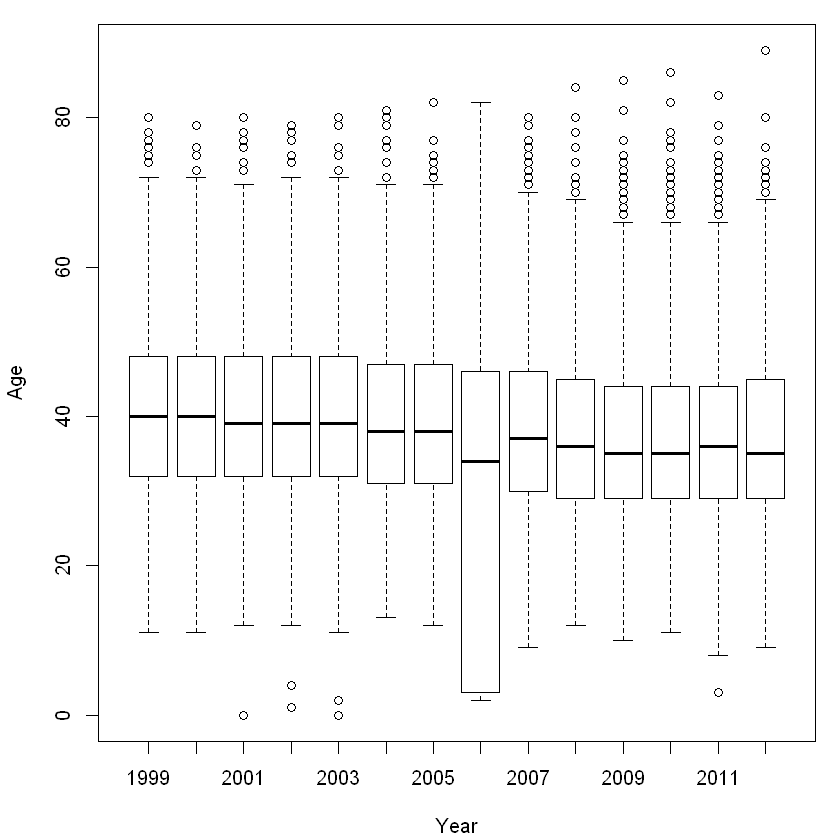

In [22]:
# age distribution
age = sapply(menResMat,
             function(x) as.numeric(x[ , 'ag']))

#pdf("CB_BoxplotAgeByYr.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

boxplot(age, ylab = "Age", xlab = "Year")

par(oldPar)
#dev.off()

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"

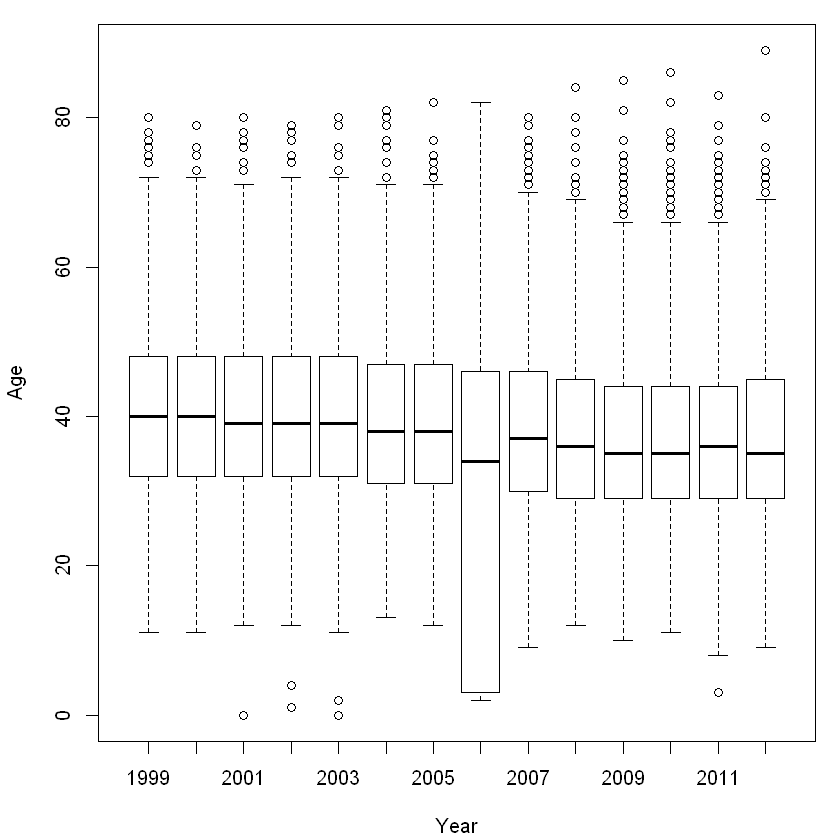

In [23]:
# age distribution
womenage = sapply(womenResMat,
             function(x) as.numeric(x[ , 'ag']))

#pdf("CB_BoxplotAgeByYr.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

boxplot(age, ylab = "Age", xlab = "Year")

par(oldPar)
#dev.off()

In [24]:
# find back age indexes
sapply(age,  function(x) sum(is.na(x)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   1    0    0    2    0    0   10    0    3    0    0    4    0    1

In [25]:
# find back age indexes
sapply(womenage,  function(x) sum(is.na(x)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   4    0    0    4    0    0    8    1    2    0    2    0    1    0

## will remove these na later on

In [26]:
# function to convert the times
convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}


In [27]:
# function to create dataframe
createDF = 
function(Res, year, sex) 
{
       # Determine which time to use
  useTime = if( !is.na(Res[1, 'net']) )  
              Res[ , 'net']
            else if( !is.na(Res[1, 'gun']) ) 
               Res[ , 'gun']
            else 
               Res[ , 'time']

  # Remove # and * and blanks from time
  useTime = gsub("[#\\*[:blank:]]", "", useTime)
  runTime = convertTime(useTime[ useTime != "" ])
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'],
                       home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

In [28]:
# call createDF function for Men
menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)
sapply(menDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0

In [29]:
# fix 2006 NA
separatorIdx = grep("^===", womenFiles[["2006"]])
separatorRow = menFiles[['2006']][separatorIdx]
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
womenFiles[['2006']][separatorIdx] = separatorRowX
womenResMat = sapply(womenFiles, extractVariables)

In [30]:
# call createDF function for women
womenDF = mapply(createDF, womenResMat, year = 1999:2012,
               sex = rep("F", 14), SIMPLIFY = FALSE)
sapply(womenDF, function(x) sum(is.na(x$runTime)))

Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0

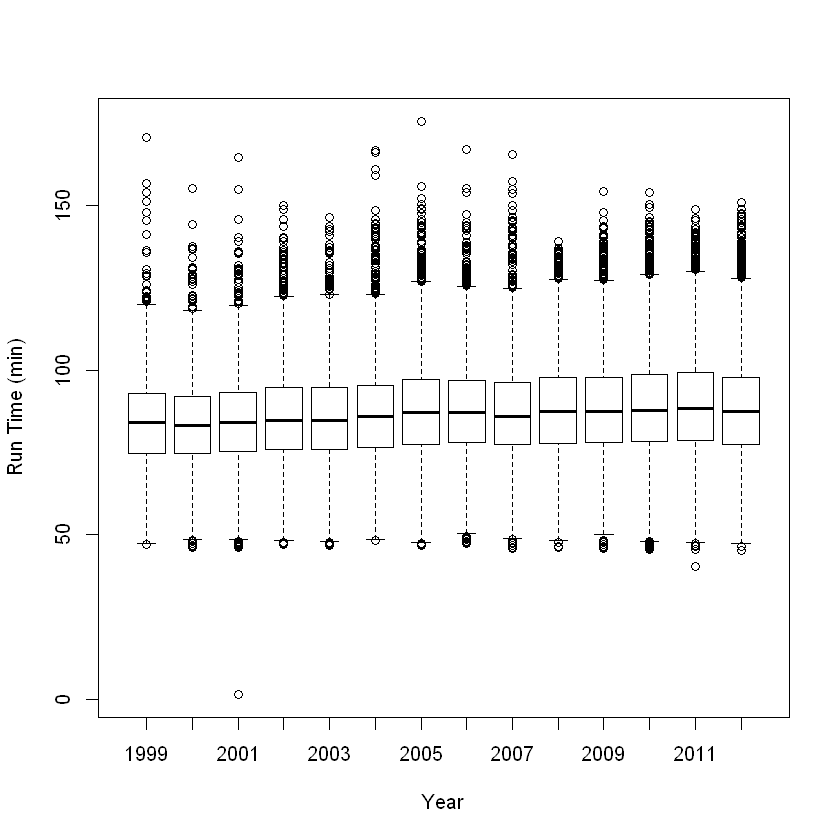

In [31]:
#pdf("CB_BoxplotTimeByYr.pdf", width = 8, height = 5)
boxplot(sapply(menDF, function(x) x$runTime), 
        xlab = "Year", ylab = "Run Time (min)")
#dev.off()

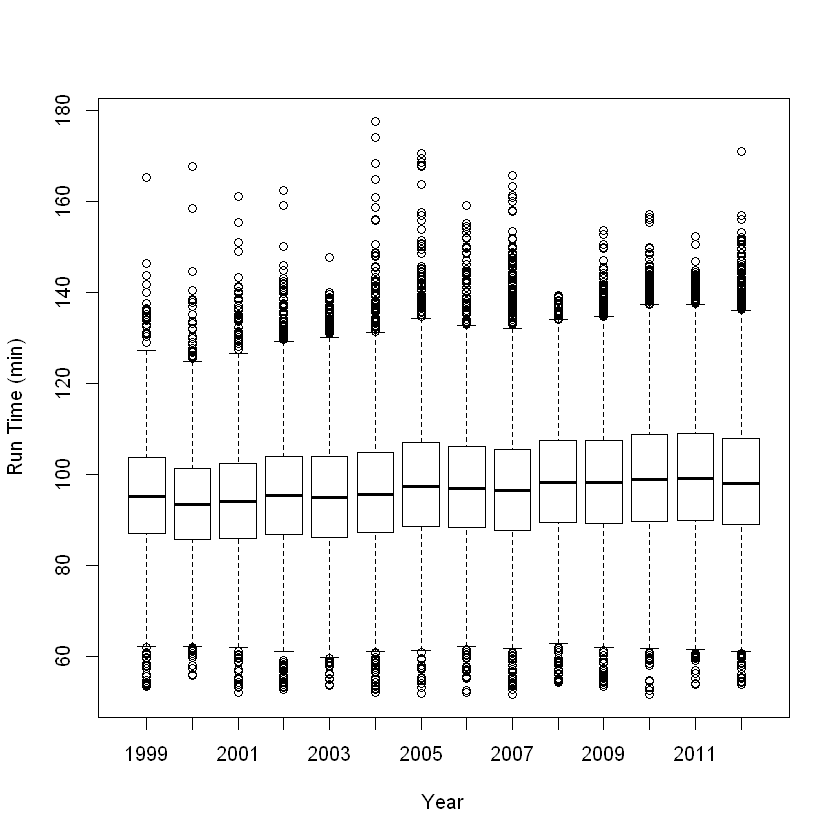

In [32]:
#pdf("CB_BoxplotTimeByYr.pdf", width = 8, height = 5)
boxplot(sapply(womenDF, function(x) x$runTime), 
        xlab = "Year", ylab = "Run Time (min)")
#dev.off()

In [33]:
cbMen = do.call(rbind, menDF)
save(cbMen, file = "cbMen.rda")

dim(cbMen)

[1] 70070     6

In [34]:
cbWomen = do.call(rbind, womenDF)
save(cbWomen, file = "cbWomen.rda")

dim(cbWomen)

[1] 75972     6

In [35]:
load("cbMen.rda")

In [36]:
load("cbWomen.rda")

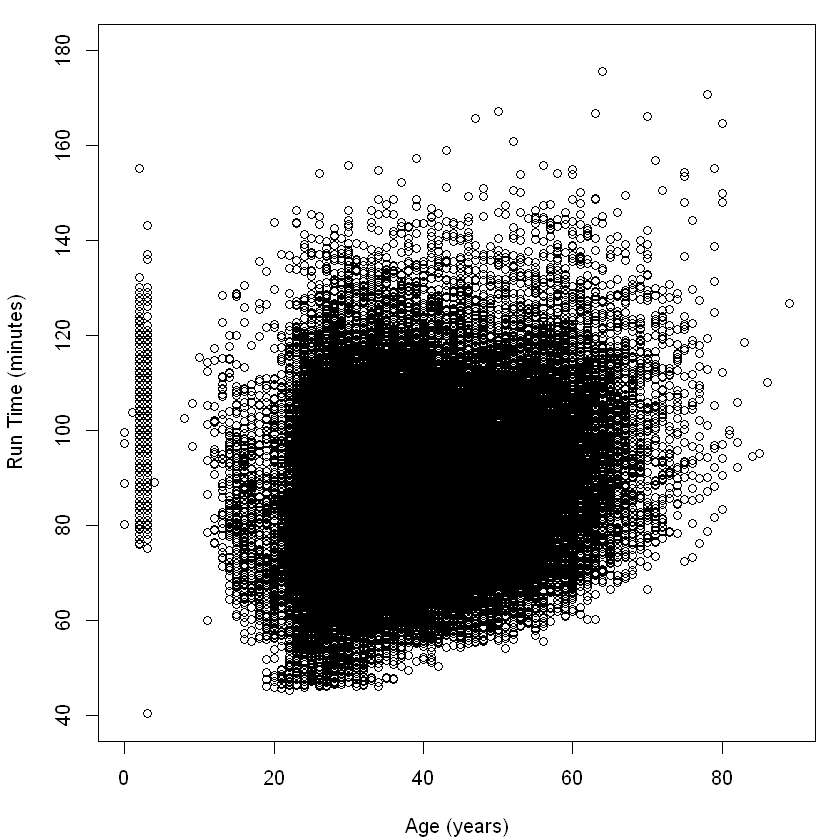

In [37]:
#pdf("CB_Overplot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(runTime ~ age, data = cbMen, ylim = c(40, 180),
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

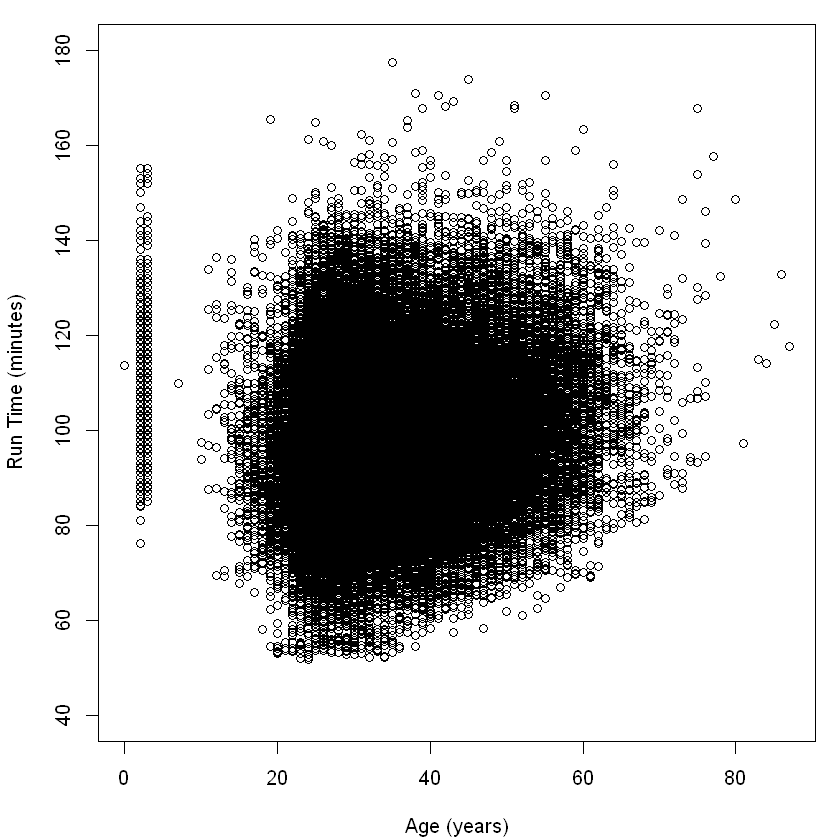

In [38]:
#pdf("CB_Overplot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(runTime ~ age, data = cbWomen, ylim = c(40, 180),
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

[1] "#54278F"

png 
  2

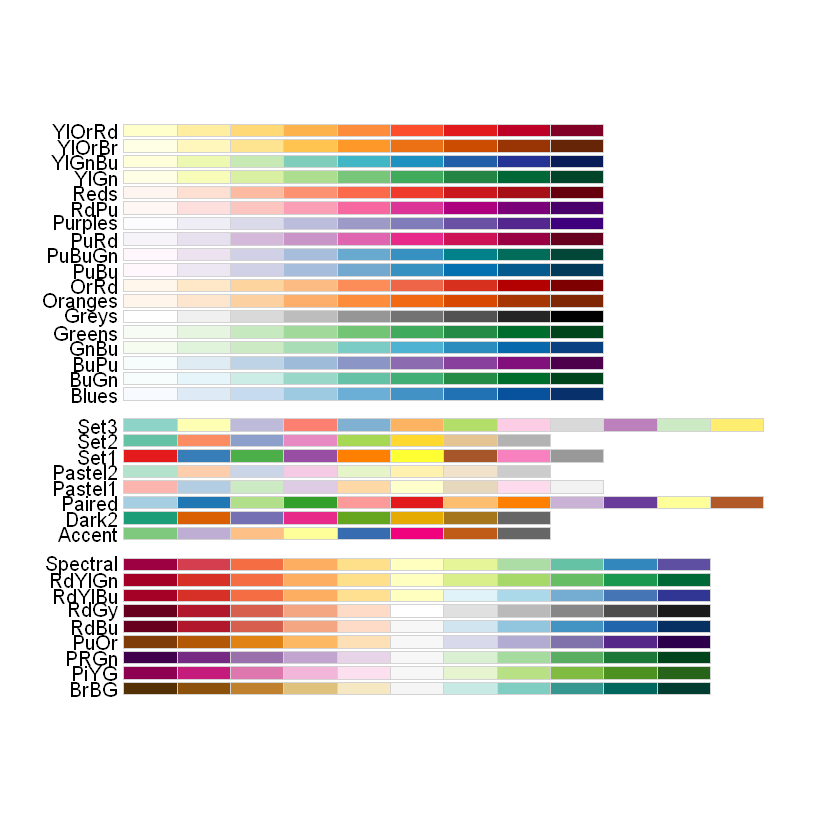

In [39]:


display.brewer.all()

Purples8 = brewer.pal(9, "Purples")[8]
Purples8

Purples8A = paste(Purples8, "14", sep = "")

pdf("CB_OverplotTransparent.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(runTime ~ jitter(age, amount = 0.5), 
     data = cbMen, 
     pch = 19,cex = 0.2, col = Purples8A,
     ylim = c(45, 165), xlim = c(15, 85),
     xlab = "Age (years)", ylab = "Run Time (minutes)")
par(oldPar)
dev.off()



[1] "#54278F"

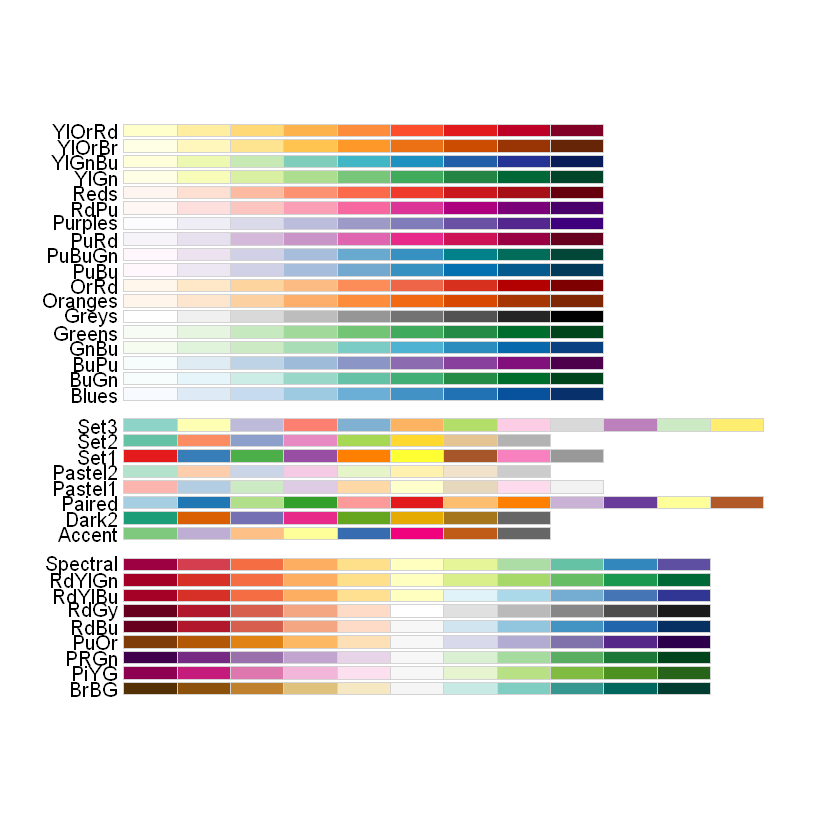

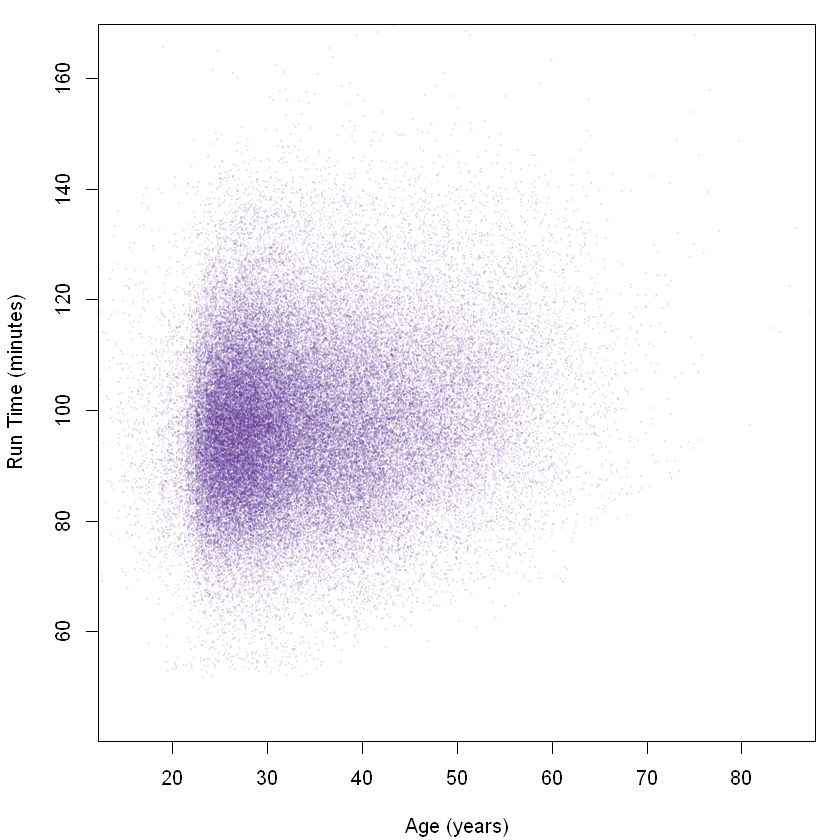

In [40]:
display.brewer.all()

Purples8 = brewer.pal(9, "Purples")[8]
Purples8

Purples8A = paste(Purples8, "14", sep = "")

#pdf("CB_OverplotTransparent.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(runTime ~ jitter(age, amount = 0.5), 
     data = cbWomen, 
     pch = 19,cex = 0.2, col = Purples8A,
     ylim = c(45, 165), xlim = c(15, 85),
     xlab = "Age (years)", ylab = "Run Time (minutes)")
par(oldPar)
#dev.off()


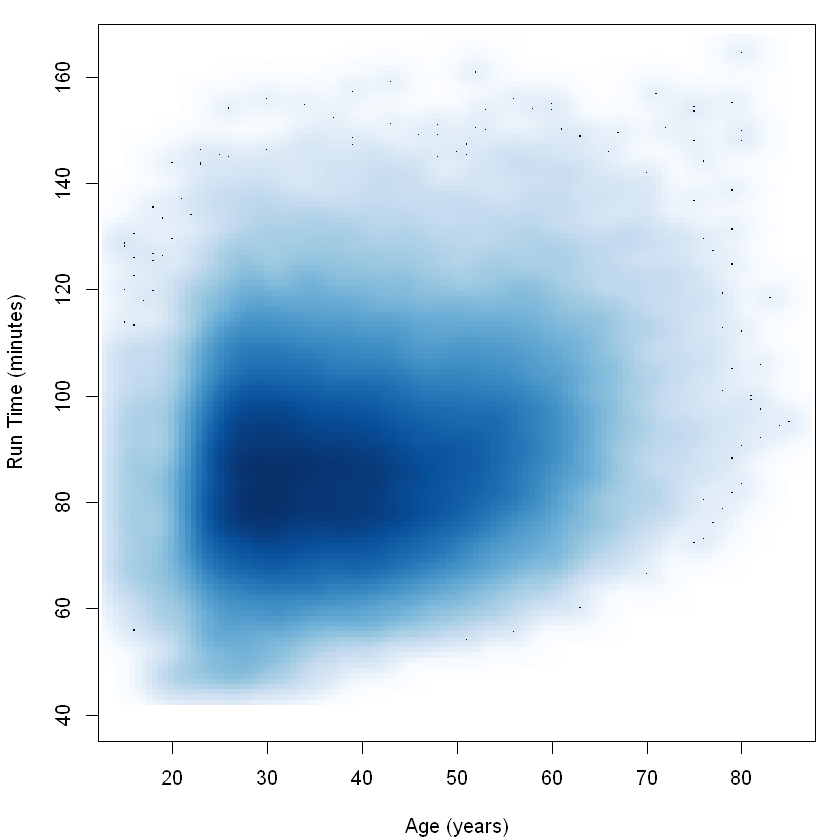

In [41]:
#pdf("CB_SmoothScatter.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(y = cbMen$runTime, x = cbMen$age,
              ylim = c(40, 165), xlim = c(15, 85),
              xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

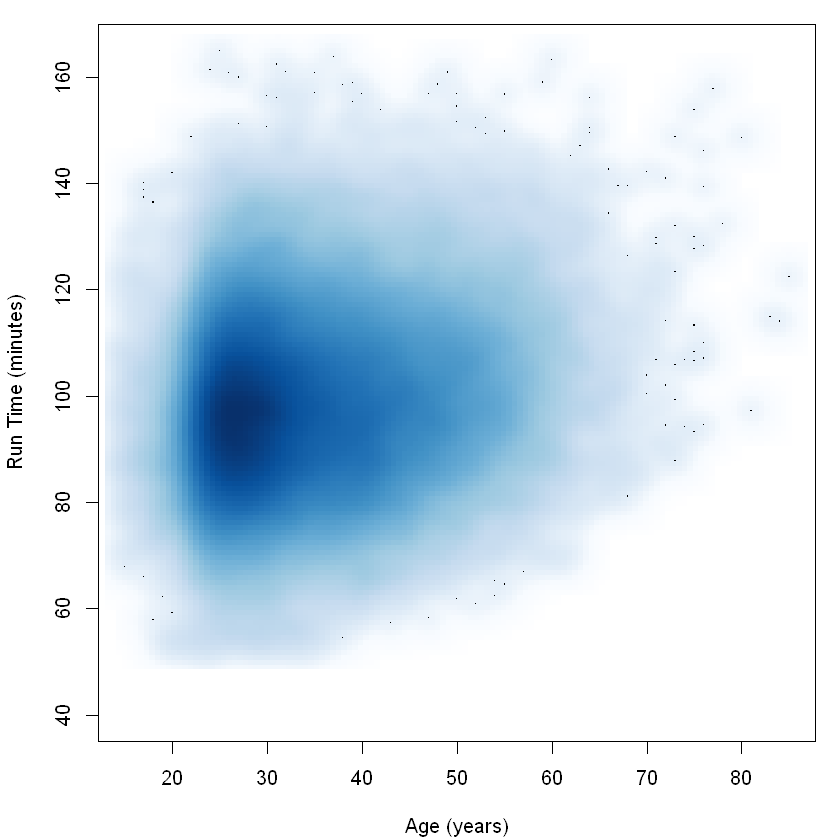

In [42]:
#pdf("CB_SmoothScatter.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(y = cbWomen$runTime, x = cbWomen$age,
              ylim = c(40, 165), xlim = c(15, 85),
              xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

ageCat
(15,25] (25,35] (35,45] (45,55] (55,65] (65,75] (75,90] 
   5535   24254   20090   12212    5001     751      69 

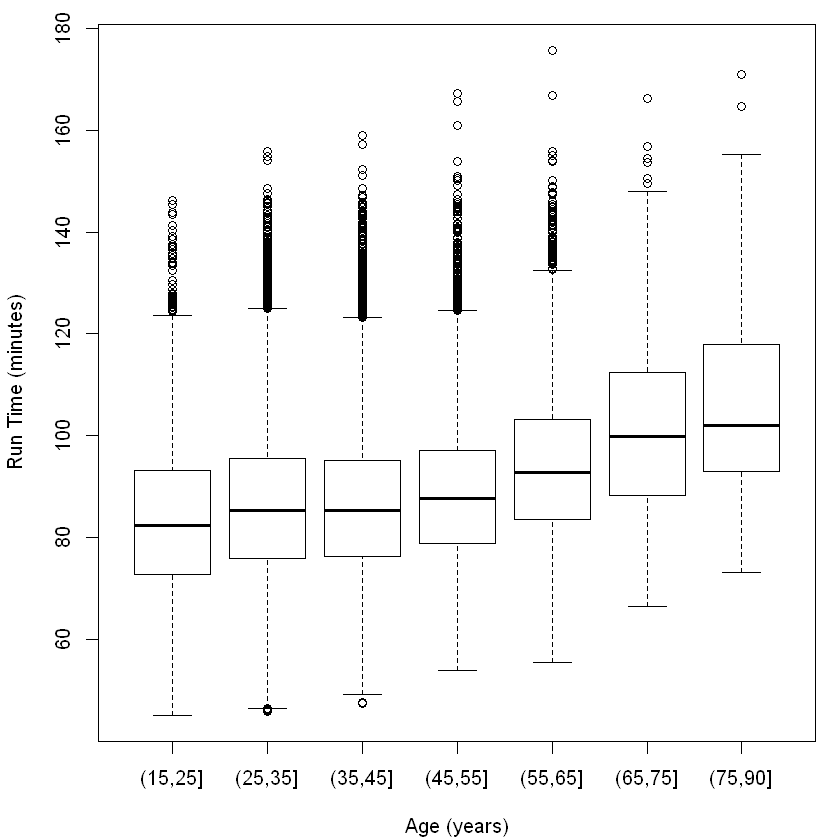

In [43]:

cbMenSub = cbMen[cbMen$runTime > 30 &
                 !is.na(cbMen$age) & cbMen$age > 15, ]

ageCat = cut(cbMenSub$age, breaks = c(seq(15, 75, 10), 90))
table(ageCat)

#pdf("CB_Boxplots.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(cbMenSub$runTime ~ ageCat, 
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

### need to fix this error -Bin

ageCat
(15,25] (25,35] (35,45] (45,55] (55,65] (65,75] (75,90] 
  12176   33950   17064    7515    1849     183      15 

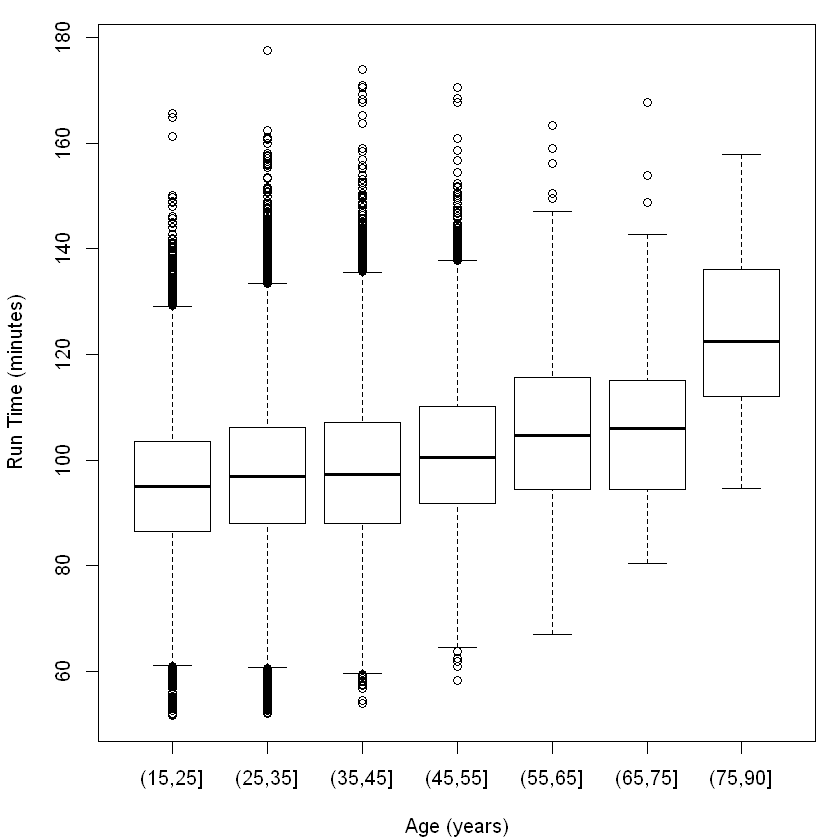

In [46]:
cbWomenSub = cbWomen[cbWomen$runTime > 30 &
                 !is.na(cbWomen$age) & cbWomen$age > 15, ]

ageCat = cut(cbWomenSub$age, breaks = c(seq(15, 75, 10), 90))
table(ageCat)

#pdf("CB_Boxplots.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(cbWomenSub$runTime ~ ageCat, 
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

In [47]:
lmAge = lm(runTime ~ age, data = cbMenSub)

lmAge$coefficients

summary(lmAge)

class(lmAge)

(Intercept)         age 
 77.8378588   0.2423742


Call:
lm(formula = runTime ~ age, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.995 -10.241  -1.069   9.091  82.250 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 77.837859   0.211002  368.90   <2e-16 ***
age          0.242374   0.005224   46.39   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.79 on 67910 degrees of freedom
Multiple R-squared:  0.03072,	Adjusted R-squared:  0.03071 
F-statistic:  2152 on 1 and 67910 DF,  p-value: < 2.2e-16


[1] "lm"

In [48]:
lmWomenAge = lm(runTime ~ age, data = cbWomenSub)

lmWomenAge$coefficients

summary(lmWomenAge)

class(lmWomenAge)

(Intercept)         age 
 90.6568807   0.2122189


Call:
lm(formula = runTime ~ age, data = cbWomenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.856  -9.588  -0.674   8.724  79.432 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 90.65688    0.19987  453.57   <2e-16 ***
age          0.21222    0.00566   37.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.18 on 72750 degrees of freedom
Multiple R-squared:  0.01896,	Adjusted R-squared:  0.01894 
F-statistic:  1406 on 1 and 72750 DF,  p-value: < 2.2e-16


[1] "lm"

* only choose 20 to 80 years old

In [49]:
age20to80 = 20:80

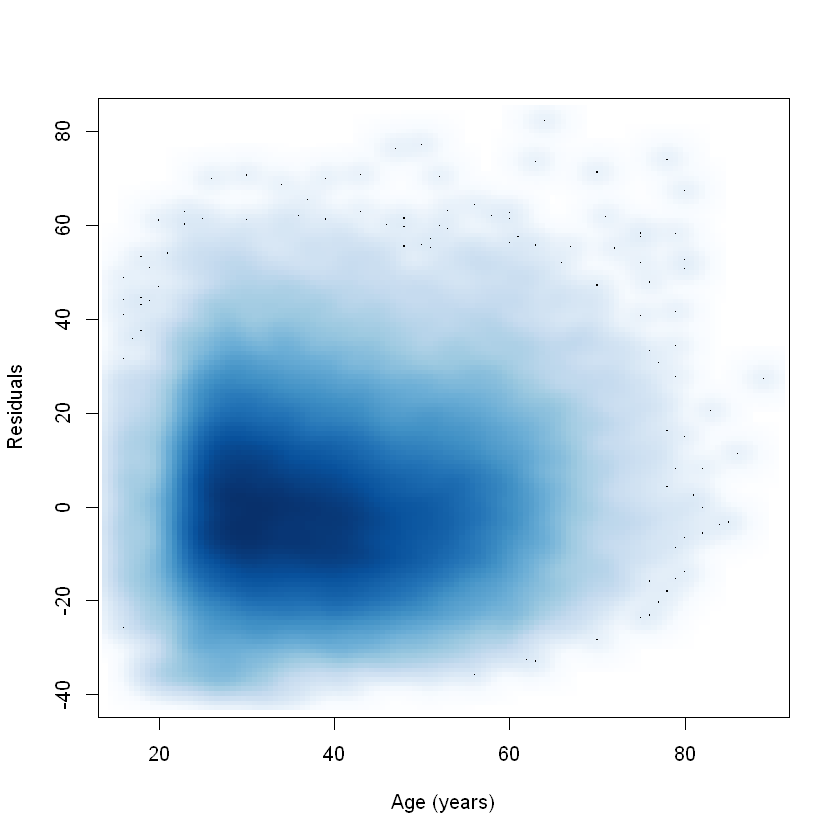

In [50]:
smoothScatter(x = cbMenSub$age, y = lmAge$residuals,
              xlab = "Age (years)", ylab = "Residuals")

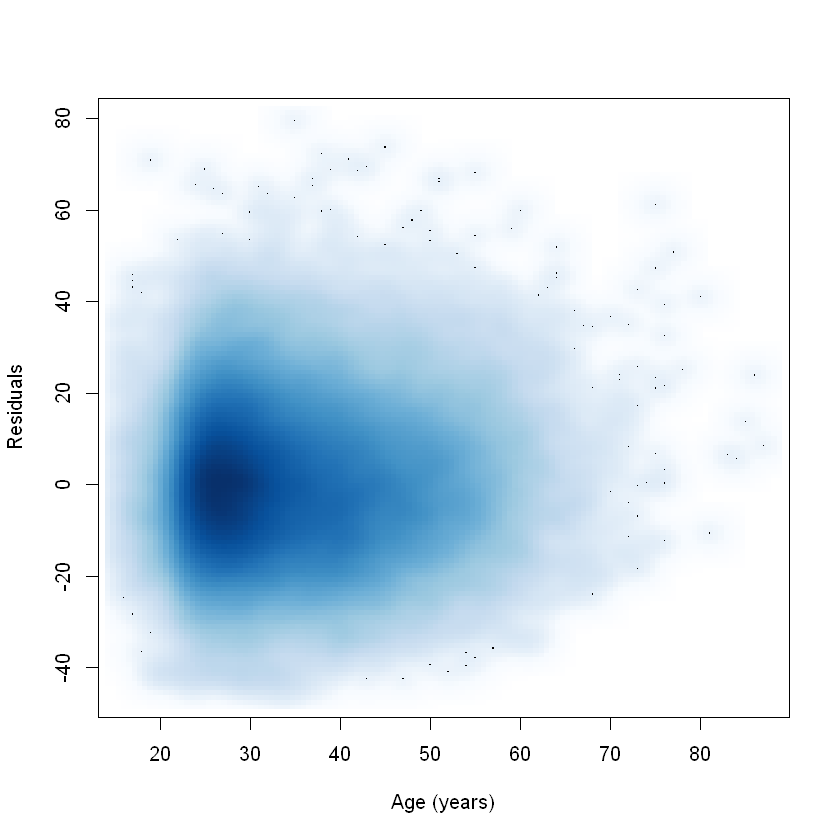

In [54]:
smoothScatter(x = cbWomenSub$age, y = lmWomenAge$residuals,
              xlab = "Age (years)", ylab = "Residuals")

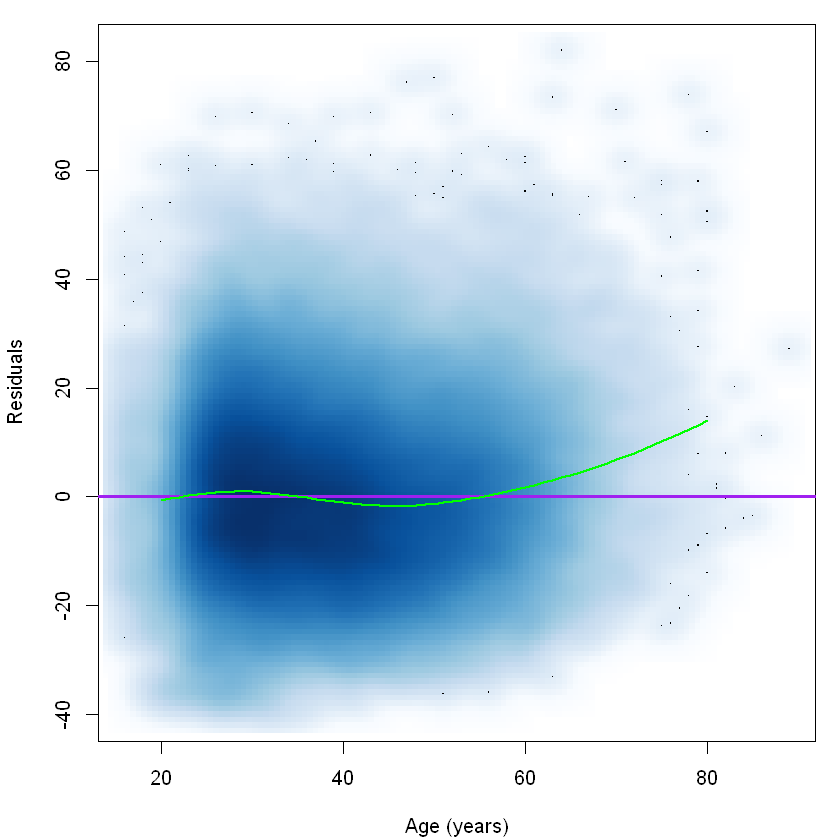

In [76]:
# smooth scatter for men
#pdf("CB_ResidSimpleLM.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(x = cbMenSub$age, y = lmAge$residuals,
              xlab = "Age (years)", ylab = "Residuals")
abline(h = 0, col = "purple", lwd = 3)
 
resid.lo = loess(resids ~ age, 
                 data = data.frame(resids = residuals(lmAge),
                                   age = cbMenSub$age))

resid.lo.pr = 
  predict(resid.lo, newdata = data.frame(age = age20to80))

lines(x = age20to80, y = resid.lo.pr, col = "green", lwd = 2)
par(oldPar)
#dev.off()

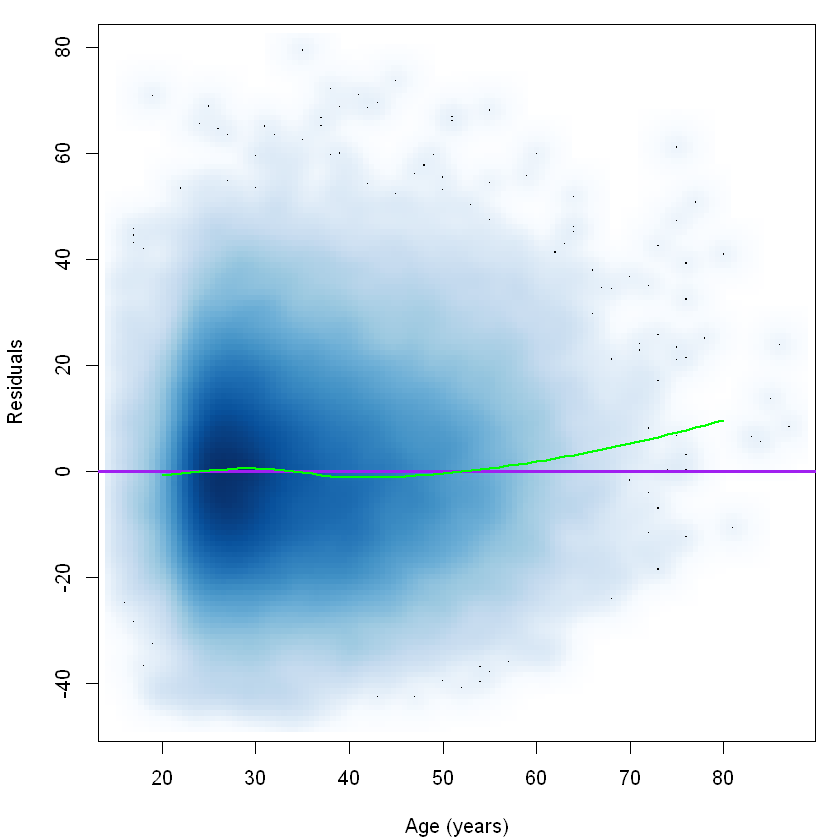

In [55]:
# smooth scatter for women
#pdf("CB_ResidSimpleLM.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(x = cbWomenSub$age, y = lmWomenAge$residuals,
              xlab = "Age (years)", ylab = "Residuals")
abline(h = 0, col = "purple", lwd = 3)
 
resid.lo = loess(resids ~ age, 
                 data = data.frame(resids = residuals(lmWomenAge),
                                   age = cbWomenSub$age))

resid.lo.pr = 
  predict(resid.lo, newdata = data.frame(age = age20to80))

lines(x = age20to80, y = resid.lo.pr, col = "green", lwd = 2)
par(oldPar)
#dev.off()

In [56]:
# men
menRes.lo = loess(runTime ~ age, cbMenSub)

menRes.lo.pr = predict(menRes.lo, data.frame(age = age20to80))

over50 = pmax(0, cbMenSub$age - 50)

lmOver50 = lm(runTime ~ age + over50, data = cbMenSub)

summary(lmOver50)


Call:
lm(formula = runTime ~ age + over50, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.942 -10.162  -0.968   9.044  79.041 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 81.737744   0.269410  303.40   <2e-16 ***
age          0.126095   0.007234   17.43   <2e-16 ***
over50       0.543199   0.023476   23.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.73 on 67909 degrees of freedom
Multiple R-squared:  0.0383,	Adjusted R-squared:  0.03827 
F-statistic:  1352 on 2 and 67909 DF,  p-value: < 2.2e-16


In [58]:
# women
womenRes.lo = loess(runTime ~ age, cbMenSub)

womenRes.lo.pr = predict(womenRes.lo, data.frame(age = age20to80))

womenover50 = pmax(0, cbWomenSub$age - 50)

womenlmOver50 = lm(runTime ~ age + womenover50, data = cbWomenSub)

summary(womenlmOver50)


Call:
lm(formula = runTime ~ age + womenover50, data = cbWomenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.719  -9.587  -0.661   8.722  79.610 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 91.912608   0.232454  395.40   <2e-16 ***
age          0.171263   0.006858   24.97   <2e-16 ***
womenover50  0.360348   0.034131   10.56   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.17 on 72749 degrees of freedom
Multiple R-squared:  0.02046,	Adjusted R-squared:  0.02043 
F-statistic: 759.7 on 2 and 72749 DF,  p-value: < 2.2e-16


In [59]:

decades = seq(30, 60, by = 10)
overAge = lapply(decades, 
                 function(x) pmax(0, (cbMenSub$age - x)))
names(overAge) = paste("over", decades, sep = "")
overAge = as.data.frame(overAge)
tail(overAge)

lmPiecewise = lm(runTime ~ . , 
                 data = cbind(cbMenSub[, c("runTime", "age")], 
                              overAge))

summary(lmPiecewise)

,over30,over40,over50,over60
67907,36,26,16,6
67908,11,1,0,0
67909,9,0,0,0
67910,26,16,6,0
67911,5,0,0,0
67912,18,8,0,0



Call:
lm(formula = runTime ~ ., data = cbind(cbMenSub[, c("runTime", 
    "age")], overAge))

Residuals:
    Min      1Q  Median      3Q     Max 
-40.471 -10.144  -0.975   9.022  78.890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 74.03209    0.93268  79.375  < 2e-16 ***
age          0.41497    0.03384  12.262  < 2e-16 ***
over30      -0.44163    0.04863  -9.082  < 2e-16 ***
over40       0.22450    0.04114   5.457 4.87e-08 ***
over50       0.45491    0.05315   8.560  < 2e-16 ***
over60       0.01058    0.07779   0.136    0.892    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.72 on 67906 degrees of freedom
Multiple R-squared:  0.03947,	Adjusted R-squared:  0.0394 
F-statistic: 558.1 on 5 and 67906 DF,  p-value: < 2.2e-16


In [60]:
decades = seq(30, 60, by = 10)
womenoverAge = lapply(decades, 
                 function(x) pmax(0, (cbWomenSub$age - x)))
names(womenoverAge) = paste("over", decades, sep = "")
womenoverAge = as.data.frame(womenoverAge)
tail(womenoverAge)

womenlmPiecewise = lm(runTime ~ . , 
                 data = cbind(cbWomenSub[, c("runTime", "age")], 
                              womenoverAge))

summary(womenlmPiecewise)

,over30,over40,over50,over60
72747,9,0,0,0
72748,10,0,0,0
72749,1,0,0,0
72750,25,15,5,0
72751,10,0,0,0
72752,8,0,0,0



Call:
lm(formula = runTime ~ ., data = cbind(cbWomenSub[, c("runTime", 
    "age")], womenoverAge))

Residuals:
    Min      1Q  Median      3Q     Max 
-45.760  -9.575  -0.666   8.725  79.764 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 87.033988   0.692914 125.606   <2e-16 ***
age          0.361307   0.025630  14.097   <2e-16 ***
over30      -0.385359   0.039992  -9.636   <2e-16 ***
over40       0.398185   0.042869   9.288   <2e-16 ***
over50       0.063711   0.069366   0.918    0.358    
over60      -0.009529   0.131578  -0.072    0.942    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.16 on 72746 degrees of freedom
Multiple R-squared:  0.02197,	Adjusted R-squared:  0.0219 
F-statistic: 326.8 on 5 and 72746 DF,  p-value: < 2.2e-16


In [61]:
overAge20 = lapply(decades, function(x) pmax(0, (age20to80 - x)))
names(overAge20) = paste("over", decades, sep = "")
overAgeDF = cbind(age = data.frame(age = age20to80), overAge20)

tail(overAgeDF)

,age,over30,over40,over50,over60
56,75,45,35,25,15
57,76,46,36,26,16
58,77,47,37,27,17
59,78,48,38,28,18
60,79,49,39,29,19
61,80,50,40,30,20


In [62]:
womenoverAge20 = lapply(decades, function(x) pmax(0, (age20to80 - x)))
names(womenoverAge20) = paste("over", decades, sep = "")
womenoverAgeDF = cbind(age = data.frame(age = age20to80), womenoverAge20)

tail(womenoverAgeDF)

,age,over30,over40,over50,over60
56,75,45,35,25,15
57,76,46,36,26,16
58,77,47,37,27,17
59,78,48,38,28,18
60,79,49,39,29,19
61,80,50,40,30,20


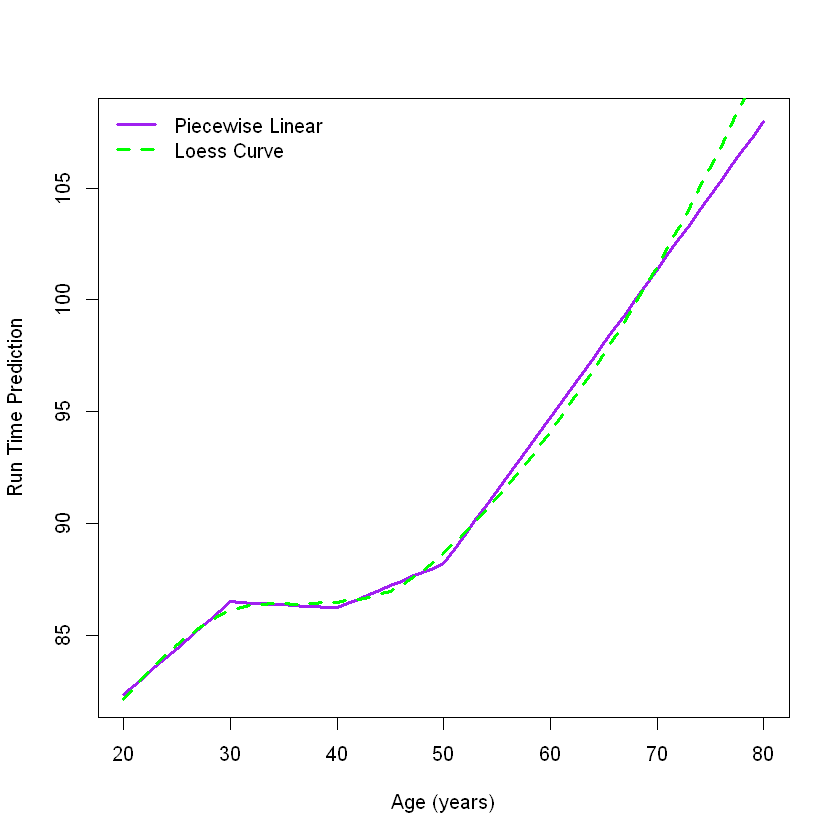

In [63]:
predPiecewise = predict(lmPiecewise, overAgeDF)

plot(predPiecewise ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = menRes.lo.pr, 
      col = "green", lty = 2, lwd = 3)
legend("topleft", col = c("purple", "green"),
       lty = c(1, 2), lwd= 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")


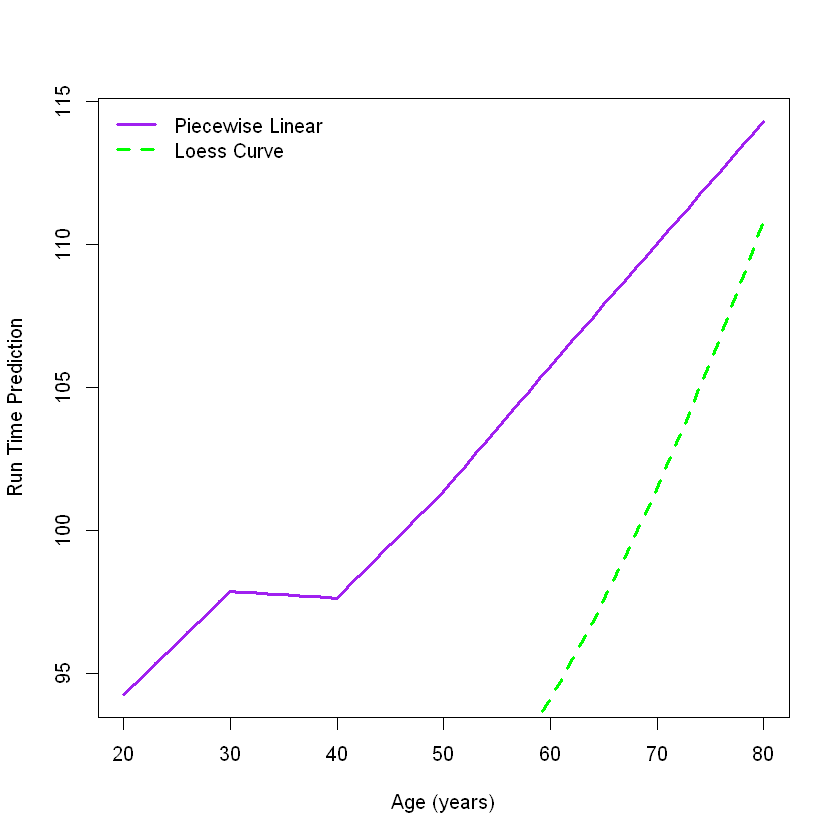

In [66]:
womenpredPiecewise = predict(womenlmPiecewise, womenoverAgeDF)

plot(womenpredPiecewise ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = womenRes.lo.pr, 
      col = "green", lty = 2, lwd = 3)
legend("topleft", col = c("purple", "green"),
       lty = c(1, 2), lwd= 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

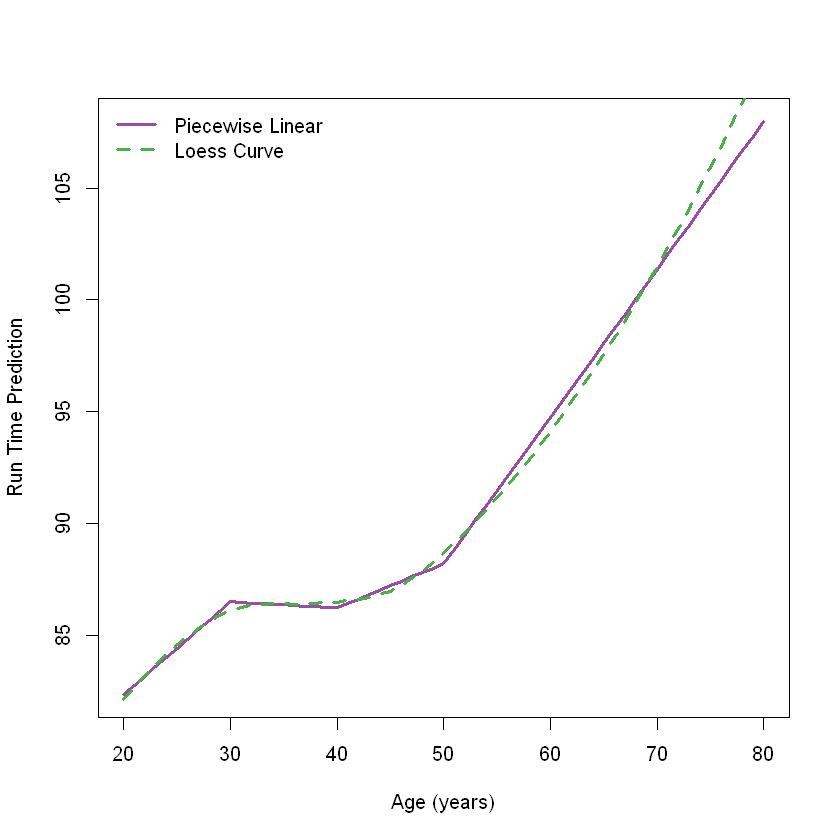

In [67]:

#pdf("CB_PiecewiseLoessCurves.pdf", width = 8, height = 6)
plot(predPiecewise ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
  #   type = "l", col = "purple", lwd = 2,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = menRes.lo.pr, col = "#4daf4a", lwd = 3, lty = 2)
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = c(1, 2), lwd = 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

#lines(x = age20to80, y = menRes.lo.pr, col = "green", lwd = 2)
#legend("topleft", col = c("purple", "green"), lty = 1, lwd = 2,
#       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")
#dev.off()

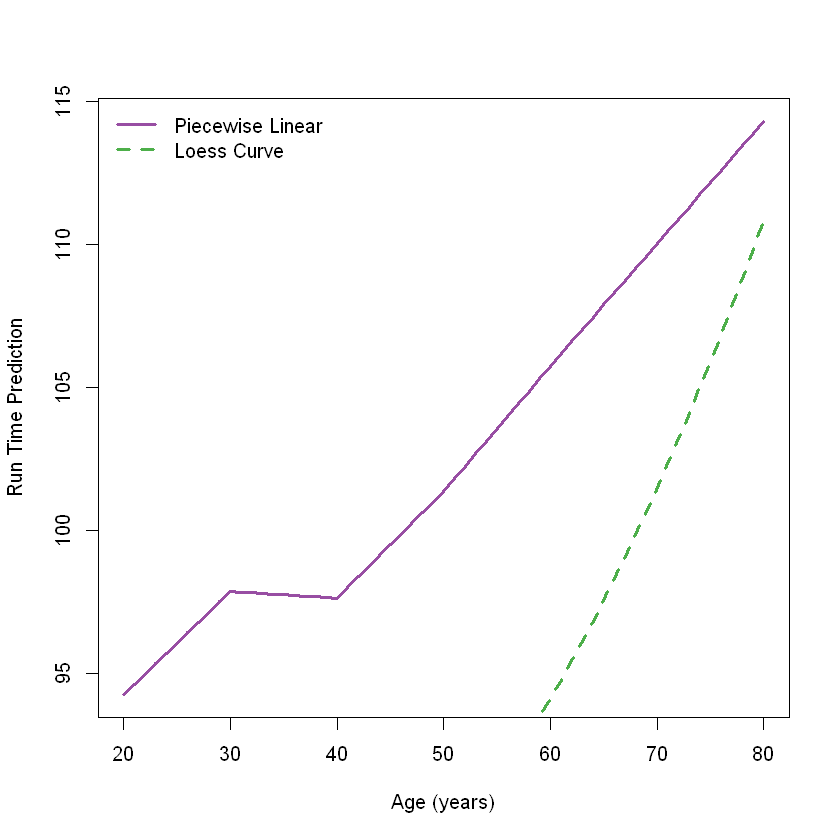

In [68]:

#pdf("CB_PiecewiseLoessCurves.pdf", width = 8, height = 6)
plot(womenpredPiecewise ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
  #   type = "l", col = "purple", lwd = 2,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = womenRes.lo.pr, col = "#4daf4a", lwd = 3, lty = 2)
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = c(1, 2), lwd = 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

#lines(x = age20to80, y = menRes.lo.pr, col = "green", lwd = 2)
#legend("topleft", col = c("purple", "green"), lty = 1, lwd = 2,
#       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")
#dev.off()

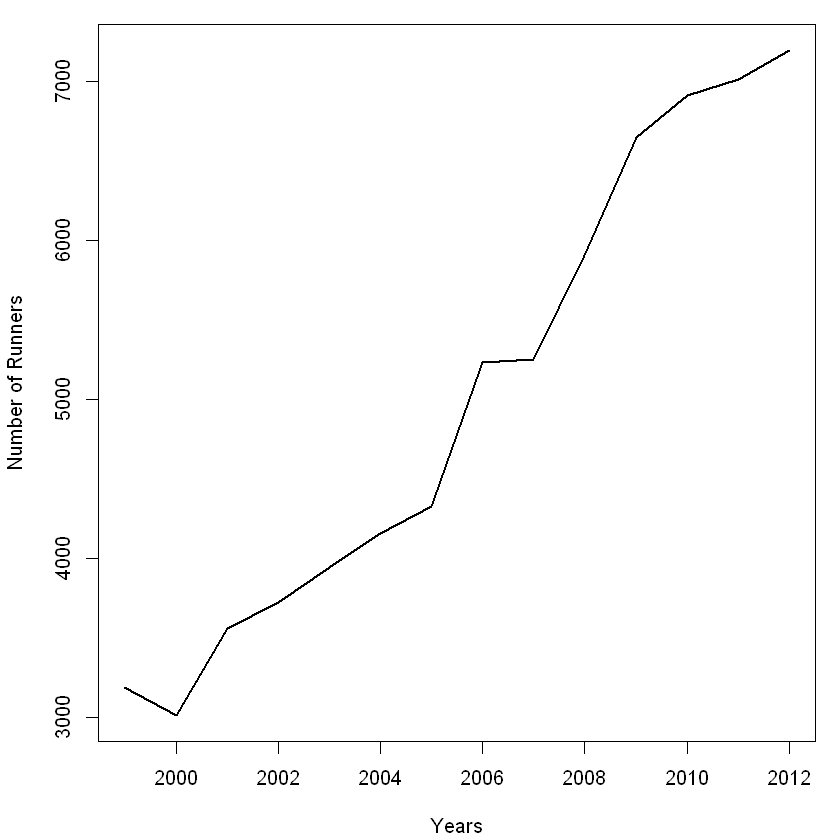

In [69]:
#pdf("CB_NumRunnersLinePlot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

numRunners = with(cbMen, tapply(runTime, year, length))
plot(numRunners ~ names(numRunners), type="l", lwd = 2,
     xlab = "Years", ylab = "Number of Runners")
par(oldPar)
#dev.off()

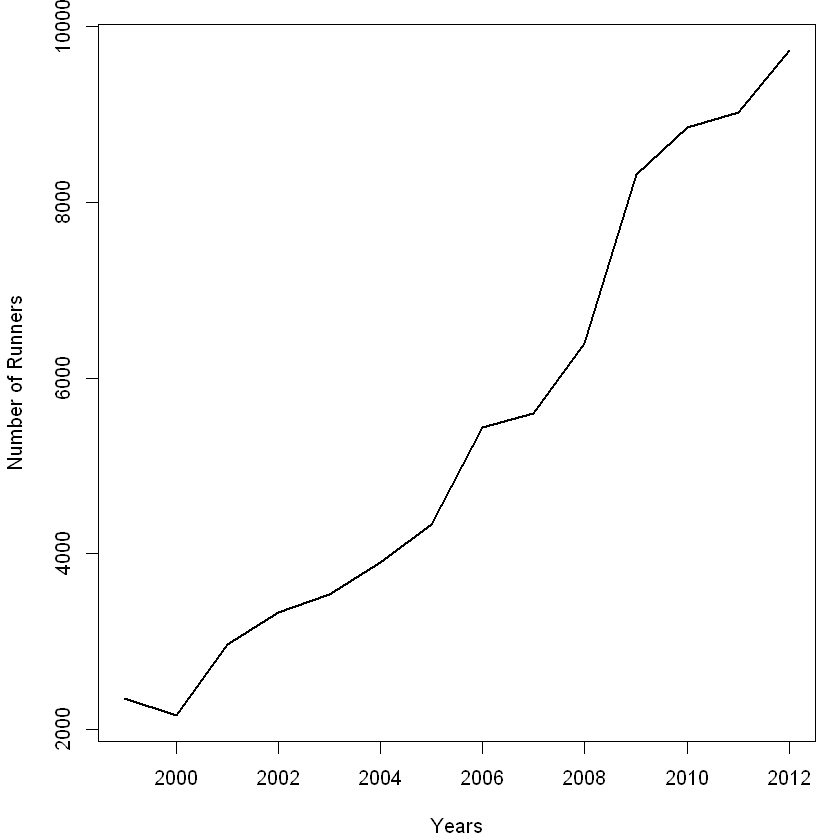

In [70]:
#pdf("CB_NumRunnersLinePlot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

numRunners = with(cbWomen, tapply(runTime, year, length))
plot(numRunners ~ names(numRunners), type="l", lwd = 2,
     xlab = "Years", ylab = "Number of Runners")
par(oldPar)
#dev.off()

In [71]:
summary(cbMenSub$runTime[cbMenSub$year == 1999])

summary(cbMenSub$runTime[cbMenSub$year == 2012])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  46.98   74.82   84.29   84.35   93.06  170.83 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.25   77.57   87.47   88.44   97.78  150.98 

In [72]:
summary(cbWomenSub$runTime[cbWomenSub$year == 1999])

summary(cbWomenSub$runTime[cbWomenSub$year == 2012])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  53.62   87.19   95.17   95.53  103.86  165.30 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  54.03   89.08   98.03   99.02  107.90  170.97 

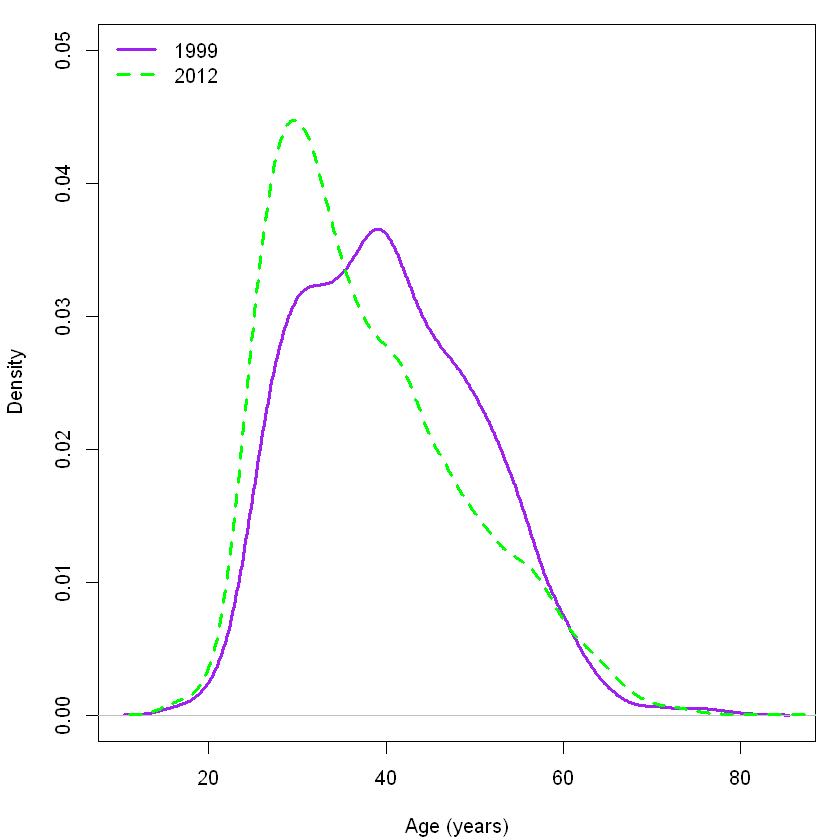

In [73]:
#pdf("CB_AgeDensity99vs12.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

age1999 = cbMenSub[ cbMenSub$year == 1999, "age" ]
age2012 = cbMenSub[ cbMenSub$year == 2012, "age" ]

plot(density(age1999, na.rm = TRUE), 
     ylim = c(0, 0.05), col = "purple",
     lwd = 3,  xlab = "Age (years)",  main = "")
lines(density(age2012, na.rm = TRUE), 
      lwd = 3, lty = 2, col="green")
legend("topleft", col = c("purple", "green"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

par(oldPar)
#dev.off()

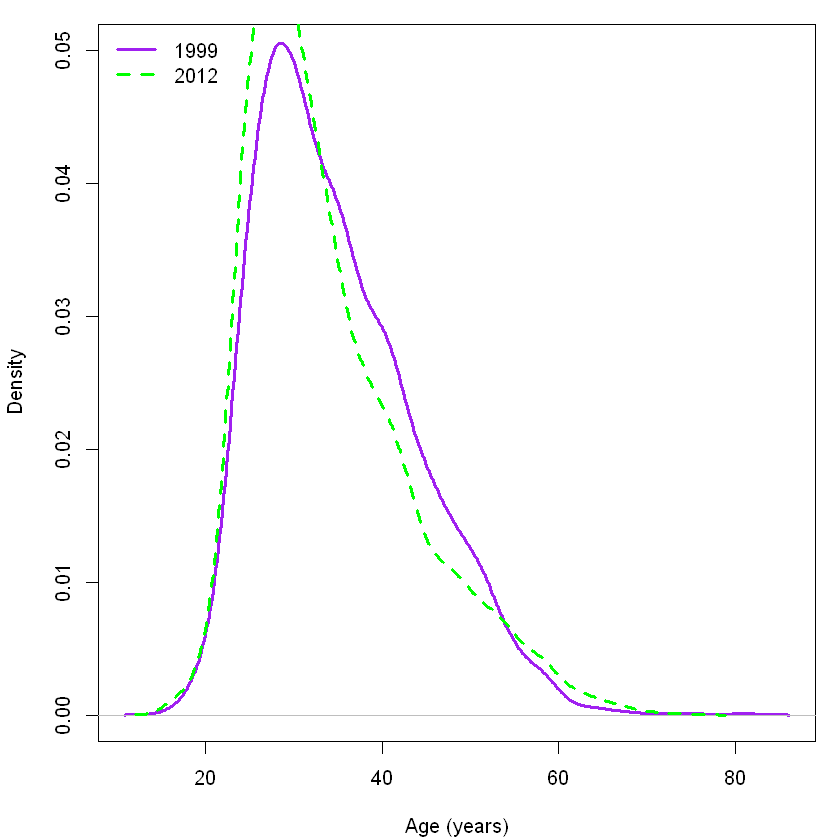

In [76]:
#pdf("CB_AgeDensity99vs12.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

womenage1999 = cbWomenSub[ cbWomenSub$year == 1999, "age" ]
womenage2012 = cbWomenSub[ cbWomenSub$year == 2012, "age" ]

plot(density(womenage1999, na.rm = TRUE), 
     ylim = c(0, 0.05), col = "purple",
     lwd = 3,  xlab = "Age (years)",  main = "")
lines(density(womenage2012, na.rm = TRUE), 
      lwd = 3, lty = 2, col="green")
legend("topleft", col = c("purple", "green"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

par(oldPar)
#dev.off()

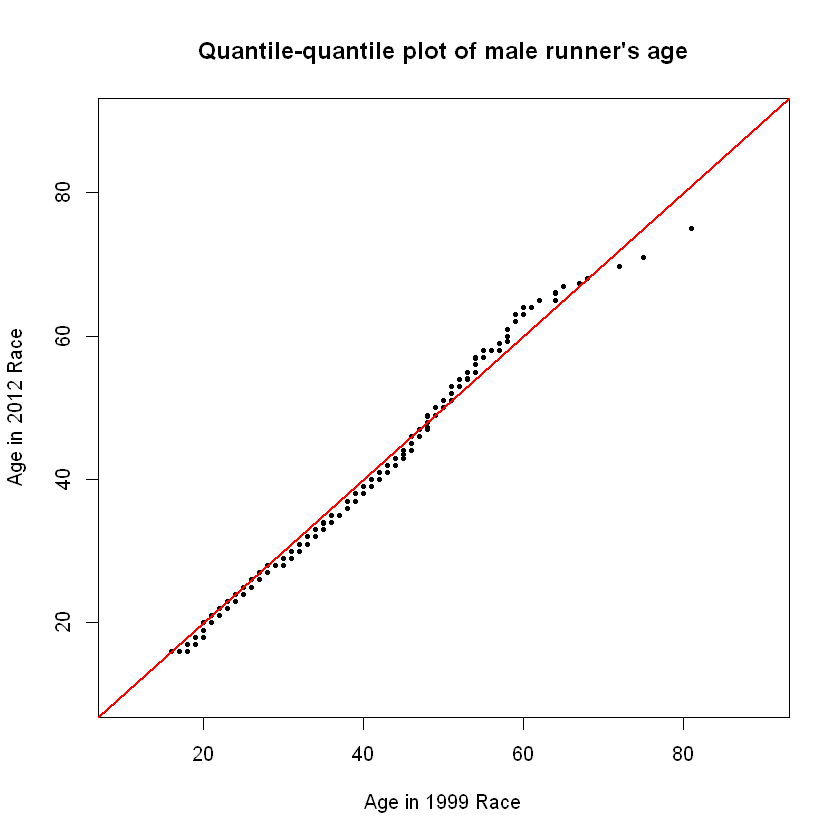

In [75]:
qqplot(age1999, age2012, pch = 19, cex = 0.5, 
       ylim = c(10,90), xlim = c(10,90), 
       xlab = "Age in 1999 Race",
       ylab = "Age in 2012 Race", 
       main = "Quantile-quantile plot of male runner's age")
abline(a =0, b = 1, col="red", lwd = 2)

mR.lo99 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 1999,])
mR.lo.pr99 = predict(mR.lo99, data.frame(age = age20to80))

mR.lo12 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 2012,])
mR.lo.pr12 = predict(mR.lo12, data.frame(age = age20to80))

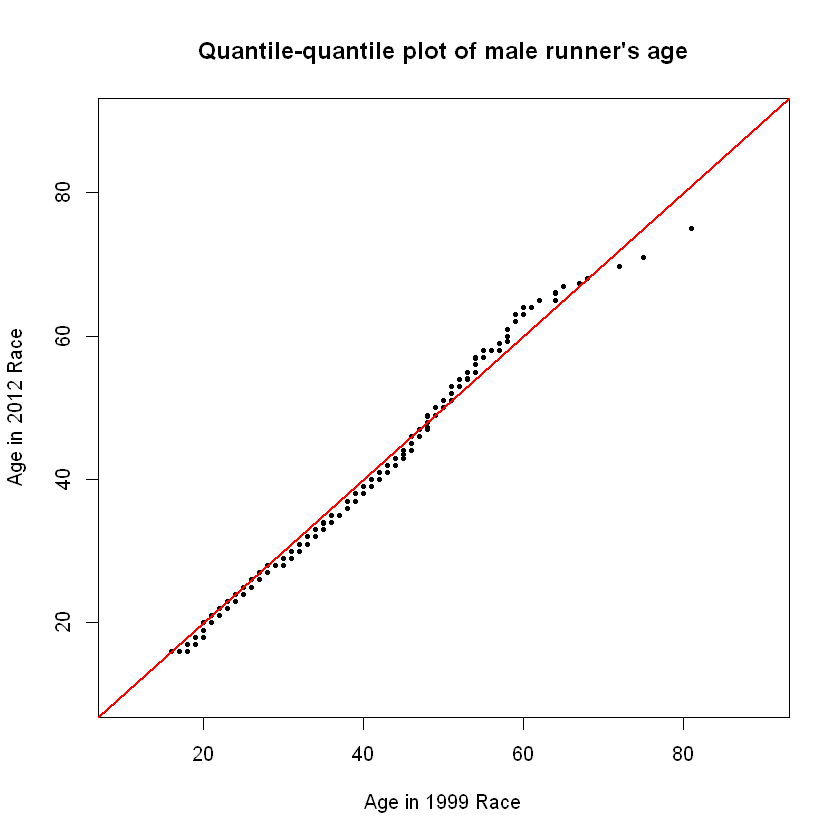

In [78]:
#Women
qqplot(womenage1999, womenage2012, pch = 19, cex = 0.5, 
       ylim = c(10,90), xlim = c(10,90), 
       xlab = "Age in 1999 Race",
       ylab = "Age in 2012 Race", 
       main = "Quantile-quantile plot of male runner's age")
abline(a =0, b = 1, col="red", lwd = 2)

womenmR.lo99 = loess(runTime ~ age, cbWomenSub[ cbWomenSub$year == 1999,])
womenmR.lo.pr99 = predict(womenmR.lo99, data.frame(age = age20to80))

womenmR.lo12 = loess(runTime ~ age, cbWomenSub[ cbWomenSub$year == 2012,])
womenmR.lo.pr12 = predict(womenmR.lo12, data.frame(age = age20to80))

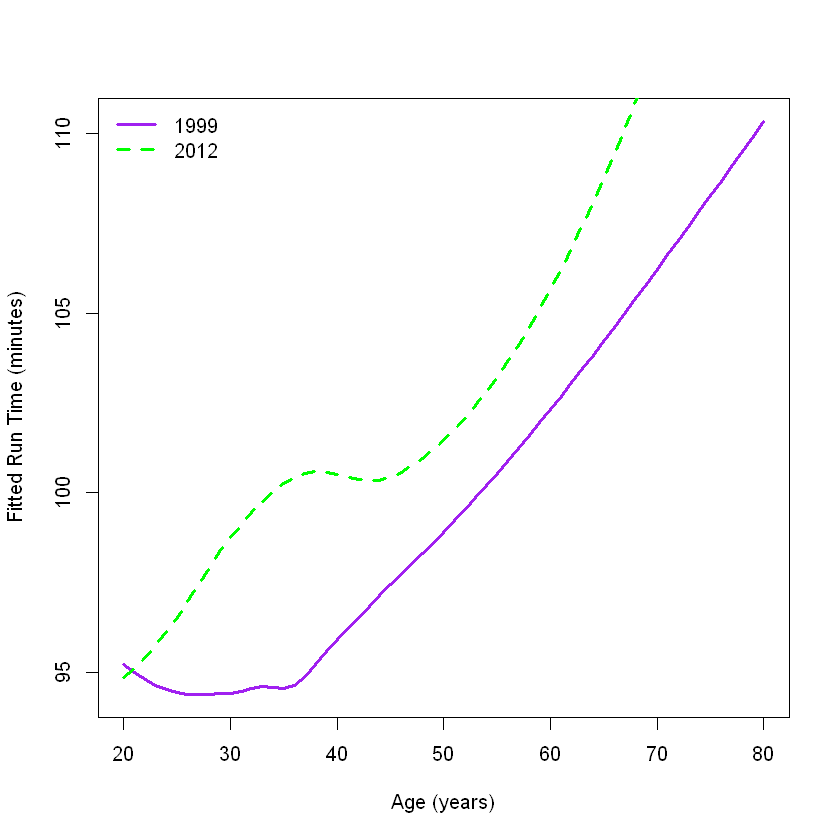

In [79]:



plot(mR.lo.pr99 ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Fitted Run Time (minutes)")
   
lines(x = age20to80, y = mR.lo.pr12,
      col = "green", lty = 2, lwd = 3)
 
legend("topleft", col = c("purple", "green"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")


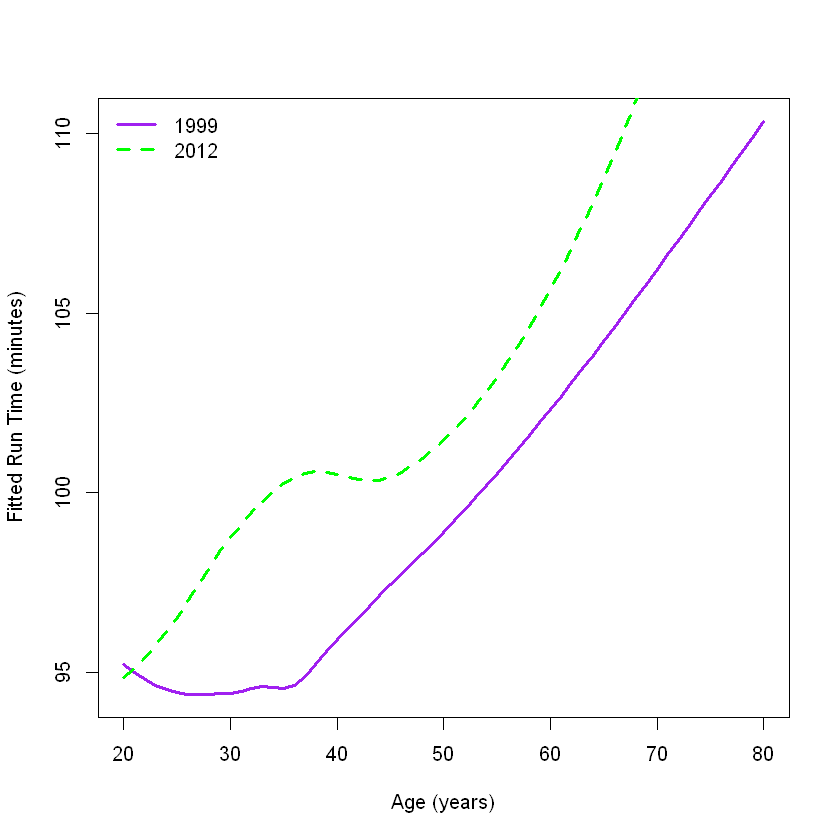

In [80]:



plot(womenmR.lo.pr99 ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Fitted Run Time (minutes)")
   
lines(x = age20to80, y = womenmR.lo.pr12,
      col = "green", lty = 2, lwd = 3)
 
legend("topleft", col = c("purple", "green"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

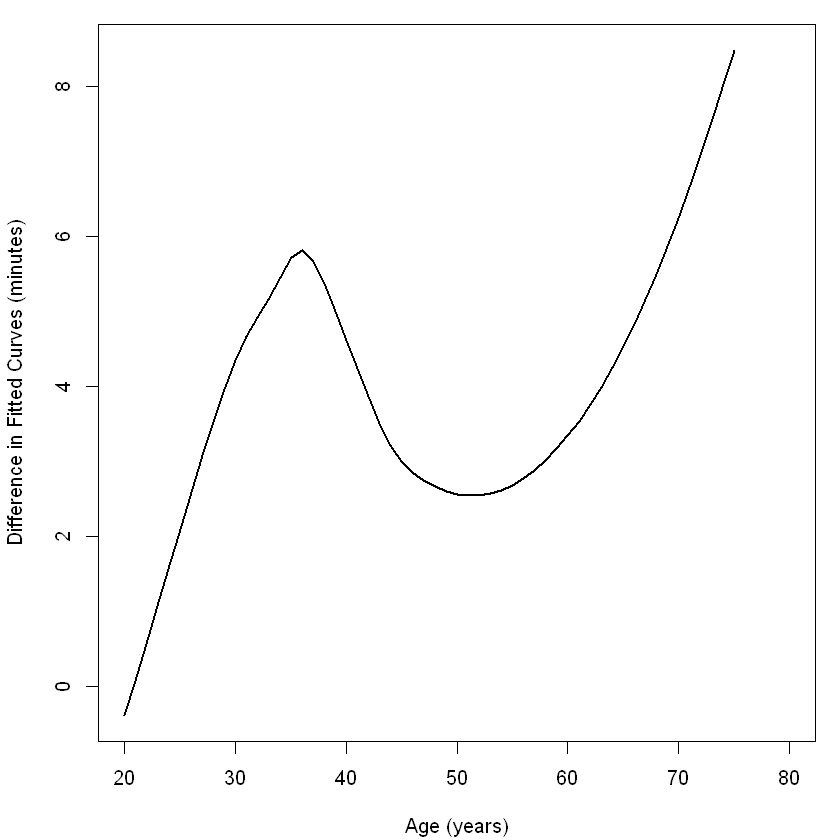

In [81]:
gap14 = mR.lo.pr12 - mR.lo.pr99

#pdf("CB_DifferenceInFittedCurves.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(gap14 ~ age20to80, type = "l" , xlab = "Age (years)", 
     ylab = "Difference in Fitted Curves (minutes)", lwd = 2)
par(oldPar)
#dev.off()

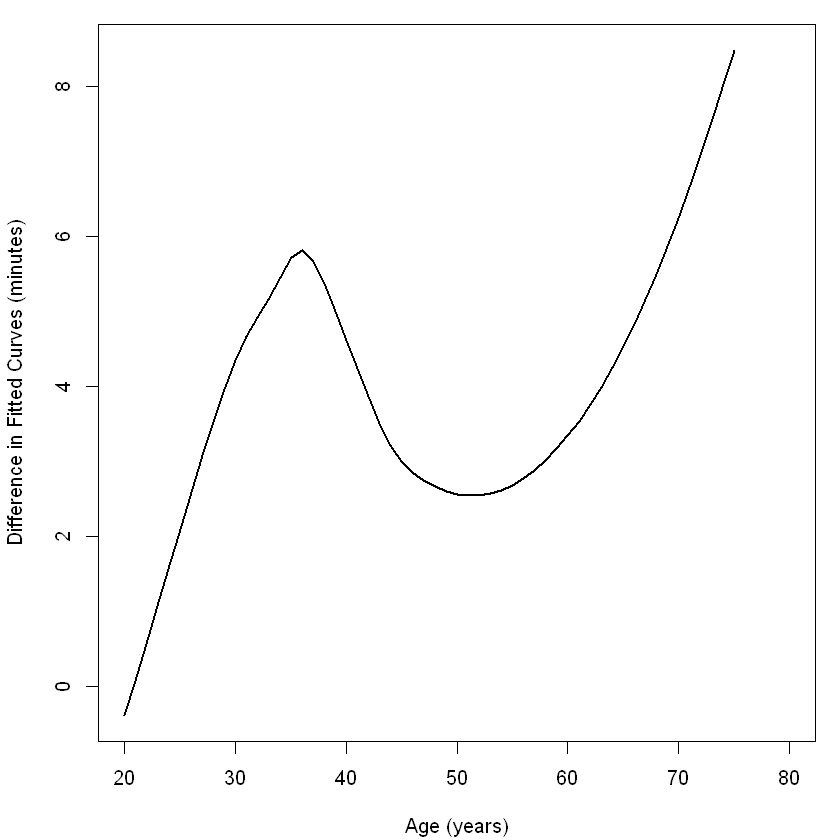

In [82]:
womengap14 = womenmR.lo.pr12 - womenmR.lo.pr99

#pdf("CB_DifferenceInFittedCurves.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(womengap14 ~ age20to80, type = "l" , xlab = "Age (years)", 
     ylab = "Difference in Fitted Curves (minutes)", lwd = 2)
par(oldPar)
#dev.off()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.7285  1.2399  1.4056  1.4228  1.5908  2.5189       9 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.6967  1.3118  1.5126  1.5315  1.7255  2.7663      13 

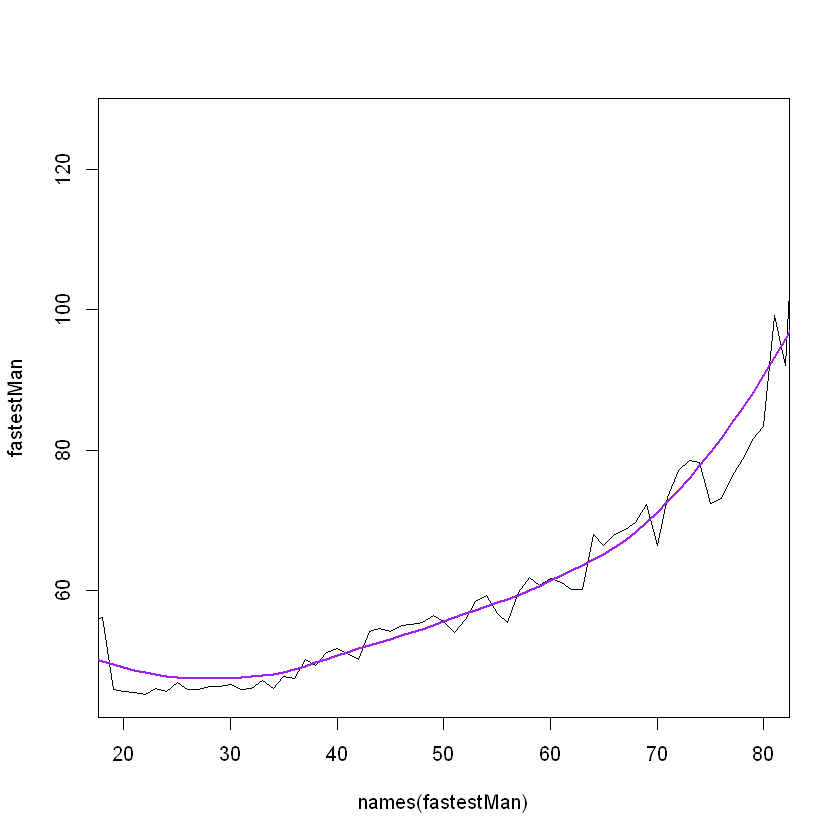

In [83]:
fastestMan = tapply(cbMenSub$runTime, cbMenSub$age, min, na.rm = TRUE)
plot(fastestMan ~ names(fastestMan), type ="l", xlim = c(20, 80))
ageFM = as.numeric(names(fastestMan))
mR.loF = loess(fastestMan ~ ageFM)
mR.lo.prF = predict(mR.loF, data.frame(age = ageFM), se = FALSE)
lines(x = ageFM, y = mR.lo.prF, col = "purple", lwd = 2)

timeNorm = cbMenSub$runTime / mR.lo.prF[as.character(cbMenSub$age)]
time99Norm = timeNorm[cbMenSub$year == 1999]
time12Norm = timeNorm[cbMenSub$year == 2012]
summary(time99Norm)

summary(time12Norm)

Warning message:
"'newdata' had 70 rows but variables found have 72 rows"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.7285  1.1937  1.3382  1.3355  1.4773  1.9233       3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.697   1.485   1.639   1.653   1.819   2.766    4853 

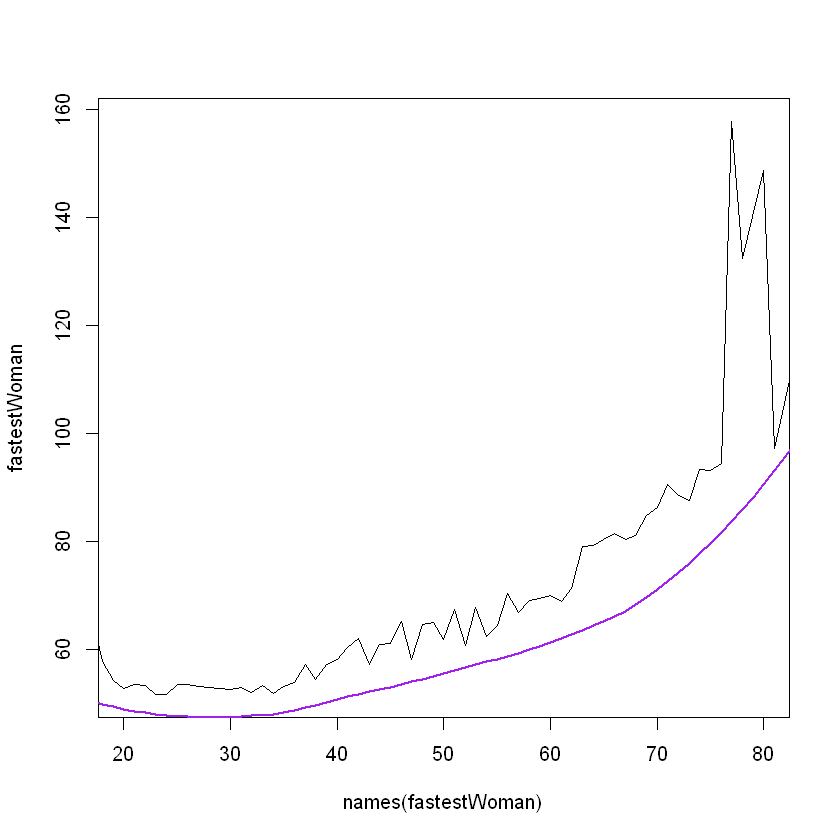

In [85]:
fastestWoman = tapply(cbWomenSub$runTime, cbWomenSub$age, min, na.rm = TRUE)
plot(fastestWoman ~ names(fastestWoman), type ="l", xlim = c(20, 80))
womenageFM = as.numeric(names(fastestWoman))
womenmR.loF = loess(fastestWoman ~ womenageFM)
womenmR.lo.prF = predict(mR.loF, data.frame(age = womenageFM), se = FALSE)
lines(x = ageFM, y = womenmR.lo.prF, col = "purple", lwd = 2)

womentimeNorm = cbWomenSub$runTime / mR.lo.prF[as.character(cbWomenSub$age)]
womentime99Norm = timeNorm[cbWomenSub$year == 1999]
womentime12Norm = timeNorm[cbWomenSub$year == 2012]
summary(womentime99Norm)

summary(womentime12Norm)

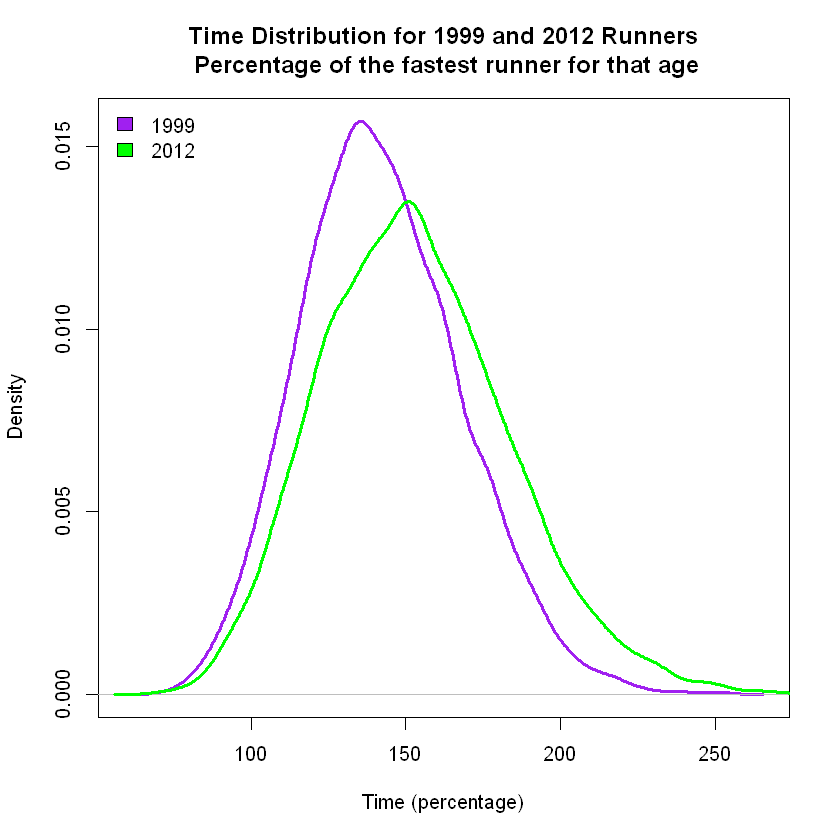

In [86]:

plot(density(100*time99Norm, na.rm = TRUE), 
    # ylim = c(0, 0.05), 
     col = "purple",
     lwd = 3,  xlab = "Time (percentage)",
     main = "Time Distribution for 1999 and 2012 Runners\n Percentage of the fastest runner for that age")
lines(density(100*time12Norm, na.rm = TRUE), 
          lwd = 3, col = "green")
legend("topleft", fill = c("purple", "green"),
       legend = c("1999", "2012"), bty = "n")


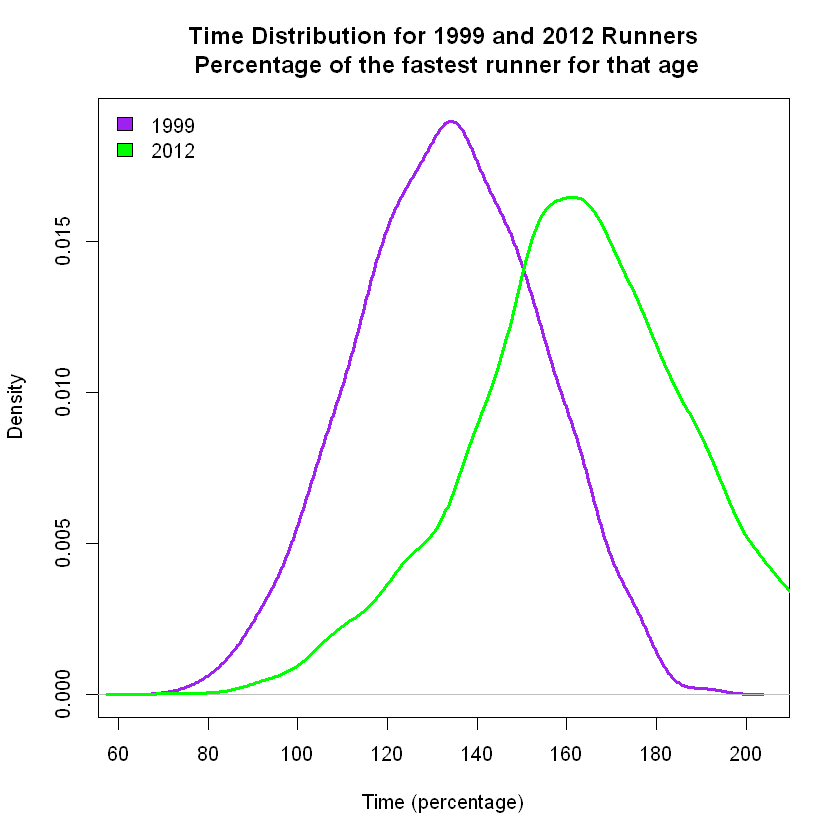

In [87]:
plot(density(100*womentime99Norm, na.rm = TRUE), 
    # ylim = c(0, 0.05), 
     col = "purple",
     lwd = 3,  xlab = "Time (percentage)",
     main = "Time Distribution for 1999 and 2012 Runners\n Percentage of the fastest runner for that age")
lines(density(100*womentime12Norm, na.rm = TRUE), 
          lwd = 3, col = "green")
legend("topleft", fill = c("purple", "green"),
       legend = c("1999", "2012"), bty = "n")


In [88]:

trimBlanks = function(charVector) {
  nameClean = gsub("^[[:blank:]]+", "", charVector)
  nameClean = gsub("[[:blank:]]+$", "", nameClean)
  nameClean = gsub("[[:blank:]]+", " ", nameClean)
}

nameClean = trimBlanks(cbMenSub$name)

length(nameClean)

length(unique(nameClean))

table(table(nameClean))

head( sort(table(nameClean), decreasing = TRUE), 1)

mSmith = cbMenSub[nameClean == "Michael Smith", ]

head(unique(mSmith$home))

nameClean = tolower(nameClean)

head( sort(table(nameClean), decreasing = TRUE), 1)

nameClean = gsub("[,.]", "", nameClean)

tabNameYr = table(cbMenSub$year, nameClean)

max(tabNameYr)

class(tabNameYr)

mode(tabNameYr)

names(attributes(tabNameYr))

dim(tabNameYr)

head(colnames(tabNameYr), 3)

which( tabNameYr == max(tabNameYr) )

which( tabNameYr == max(tabNameYr), arr.ind = TRUE )

indMax = which( tabNameYr == max(tabNameYr), arr.ind = TRUE )
colnames(tabNameYr)[indMax[2]]

cbMenSub$nameClean = nameClean

cbMenSub$yob = cbMenSub$year - cbMenSub$age

[1] 67912

[1] 42092


    1     2     3     4     5     6     7     8     9    10    11    12    13 
28928  7533  2666  1311   688   381   232   138    86    53    42    21     6 
   14    15    17    18    19    29 
    2     1     1     1     1     1 

Michael Smith 
           29

[1] "Annapolis MD      "  "Bethesda MD       "  "Annapolis MD       "
[4] "Chevy Chase MD     " "Annandale VA       " "Springfield VA     "

michael smith 
           32

[1] 5

[1] "table"

[1] "numeric"

[1] "dim"      "dimnames" "class"

[1]    14 38359

[1] "8illiam maury"   "a gudu memon"    "a miles simmons"

[1] 348950

,,nameClean
2012,14,24925


[1] "michael brown"

In [93]:

womennameClean = trimBlanks(cbWomenSub$name)

length(womennameClean)

length(unique(womennameClean))

table(table(womennameClean))

head( sort(table(womennameClean), decreasing = TRUE), 1)

mSmith = cbWomenSub[womennameClean == "Michael Smith", ]

head(unique(mSmith$home))

womennameClean = tolower(womennameClean)

head( sort(table(womennameClean), decreasing = TRUE), 1)

womennameClean = gsub("[,.]", "", womennameClean)

tabNameYr = table(cbWomenSub$year, womennameClean)

max(tabNameYr)

class(tabNameYr)

mode(tabNameYr)

names(attributes(tabNameYr))

dim(tabNameYr)

head(colnames(tabNameYr), 3)

which( tabNameYr == max(tabNameYr) )

which( tabNameYr == max(tabNameYr), arr.ind = TRUE )

indMax = which( tabNameYr == max(tabNameYr), arr.ind = TRUE )
colnames(tabNameYr)[indMax[2]]

cbWomenSub$womennameClean = womennameClean

cbWomenSub$yob = cbWomenSub$year - cbWomenSub$age

[1] 72752

[1] 49679


    1     2     3     4     5     6     7     8     9    10    11    12    13 
36077  8616  2774  1164   498   242   120    96    48    20    15     5     2 
   16 
    2 

Jennifer Johnson 
              16

character(0)

linda kennedy 
           19

[1] 4

[1] "table"

[1] "numeric"

[1] "dim"      "dimnames" "class"

[1]    14 46877

[1] "7068chris ann strahan" "a brooke bennett"      "a glymph"

[1]  13104 261037 261039 275838 470217 572907

,,womennameClean
2012,14,936
2005,7,18646
2007,9,18646
2008,10,19703
2011,13,33587
2011,13,40922


[1] "aarti shenoy"

In [94]:

# Fix home in a similar way
homeClean = trimBlanks(tolower(cbMenSub$home))
cbMenSub$homeClean = gsub("[,.]", "", homeClean)

vars = c("year", "homeClean", "nameClean", "yob",  "runTime")
mb = which(nameClean == "michael brown")
birthOrder = order(cbMenSub$yob[mb])
cbMenSub[mb[birthOrder], vars]

cbMenSub$ID = paste(nameClean, cbMenSub$yob, sep = "_")

,year,homeClean,nameClean,yob,runTime
2000.2526,2000,tucson az,michael brown,1939,96.88333
2010.4241,2010,north east md,michael brown,1953,92.26667
2011.3026,2011,north east md,michael brown,1953,85.95000
2012.3800,2012,north east md,michael brown,1953,88.43333
2009.5246,2009,oakton va,michael brown,1957,99.73333
2008.3896,2008,ashburn va,michael brown,1958,93.73333
2009.3509,2009,ashburn va,michael brown,1958,88.56667
2010.5309,2010,ashburn va,michael brown,1958,99.75000
2012.4078,2012,reston va,michael brown,1958,89.95000
2006.2631,2006,chevy chase,michael brown,1966,84.56667


In [95]:
# Fix home in a similar way
womenhomeClean = trimBlanks(tolower(cbWomenSub$home))
cbWomenSub$womenhomeClean = gsub("[,.]", "", womenhomeClean)

vars = c("year", "homeClean", "nameClean", "yob",  "runTime")
mb = which(womennameClean == "michael brown")
birthOrder = order(cbWomenSub$yob[mb])
cbWomenSub[mb[birthOrder], vars]

cbWomenSub$ID = paste(womennameClean, cbWomenSub$yob, sep = "_")

ERROR: Error in `[.data.frame`(cbWomenSub, mb[birthOrder], vars): undefined columns selected


In [96]:

races = tapply(cbMenSub$year, cbMenSub$ID, length)

races8 = names(races)[which(races >= 8)]

men8 = cbMenSub[ cbMenSub$ID %in% races8, ]

orderByRunner = order(men8$ID, men8$year)
men8 = men8[orderByRunner, ]

men8L = split(men8, men8$ID)
names(men8L) = races8

length(unique(men8$ID))

gapTime = tapply(men8$runTime, men8$ID,
                 function(t) any(abs(diff(t)) > 20))

gapTime = sapply(men8L, function(df) 
                          any(abs(diff(df$runTime)) > 20))

sum(gapTime)

[1] 461

[1] 47

In [97]:

lapply(men8L[ gapTime ][1:2], function(df) df[, vars])

homeLen = nchar(cbMenSub$homeClean)

cbMenSub$state = substr(cbMenSub$homeClean, 
                        start = homeLen - 1, stop = homeLen)

cbMenSub$state[cbMenSub$year == 2006] = NA

cbMenSub$ID = paste(cbMenSub$nameClean, cbMenSub$yob, 
                    cbMenSub$state, sep = "_")

numRaces = tapply(cbMenSub$year, cbMenSub$ID, length)
races8 = names(numRaces)[which(numRaces >= 8)]
men8 = cbMenSub[ cbMenSub$ID %in% races8, ]
orderByRunner = order(men8$ID, men8$year)
men8 = men8[orderByRunner, ]

men8L = split(men8, men8$ID)
names(men8L) = races8

length(races8)

,year,homeClean,nameClean,yob,runTime
1999.2640,1999,gaithersburg md,abiy zewde,1967,96.51667
2000.2616,2000,montgomery vill md,abiy zewde,1967,96.63333
2001.2276,2001,montgomery vill md,abiy zewde,1967,89.10000
2002.3684,2002,montgomery vill md,abiy zewde,1967,123.00000
2003.3301,2003,gaithersburg md,abiy zewde,1967,97.68333
2004.3579,2004,montgomery vill md,abiy zewde,1967,100.36667
2008.4562,2008,montgomery vill md,abiy zewde,1967,98.78333
2009.5072,2009,montgomery villag md,abiy zewde,1967,98.50000
2010.5330,2010,montgomery villag md,abiy zewde,1967,99.91667
2011.6493,2011,montgomery villag md,abiy zewde,1967,113.10000


[1] 306

In [98]:

groups = 1 + (1:length(men8L) %% 9)

In [99]:

addRunners = function(listRunners, colors, numLty) 
{
  numRunners = length(listRunners)
  colIndx = 1 + (1:numRunners) %% length(colors)
  ltys = rep(1:numLty, each = length(colors), length = numRunners)

  mapply(function(df, i) {      
           lines(df$runTime ~ df$age, 
           col = colors[colIndx[i]], lwd = 2, lty = ltys[i])
         }, listRunners, i = 1:numRunners) 
}


In [100]:

fitOne = function(oneRunner, addLine = FALSE, col = "grey") {
  lmOne = lm(runTime ~ age, data = oneRunner)
  if (addLine) 
    lines(x = oneRunner$age, y = predict(lmOne), 
          col = col, lwd = 2, lty = 2)

  ind = floor( (nrow(oneRunner) + 1) / 2)
  res = c(coefficients(lmOne)[2], oneRunner$age[ind],
          predict(lmOne)[ind])
  names(res) = c("ageCoeff", "medAge", "predRunTime")
  return(res)
}

$`allen greenberg_1966_dc`
NULL

$`barry goldmeier_1965_md`
NULL

$`brian carroll_1956_md`
NULL

$`charlie sole_1946_va`
NULL

$`curtis dalton_1952_md`
NULL

$`david gearin_1945_va`
NULL

$`desi alston_1953_va`
NULL

$`edward hagarty_1955_md`
NULL

$`erik fatemi_1966_va`
NULL

$`fred carson_1940_md`
NULL

$`gerald royce_1942_va`
NULL

$`hunter montgomery_1969_md`
NULL

$`james snee_1961_md`
NULL

$`jim o'donnell_1964_dc`
NULL

$`john sauer_1956_md`
NULL

$`jonathan agin_1972_va`
NULL

$`keith buell_1974_va`
NULL

$`kevin barrett_1959_ma`
NULL

$`len gemma_1960_md`
NULL

$`louis garczynski_1940_va`
NULL

$`mark fraley_1957_oh`
NULL

$`michael davitt_1954_md`
NULL

$`michael mcroberts_1963_va`
NULL

$`milton vazquez_1954_md`
NULL

$`omar ali_1971_md`
NULL

$`paul warren_1950_ny`
NULL

$`ralph mckinney_1945_de`
NULL

$`richard joseph_1964_ny`
NULL

$`robert platt_1952_va`
NULL

$`ronnie wong_1947_md`
NULL

$`stephen chavez_1953_md`
NULL

$`thomas engle_1959_va`
NULL

$`tracy wilson_1960_va`
NULL

$`william furlong_1955_va`
NULL

$`allen greenberg_1966_dc`
   ageCoeff      medAge predRunTime 
-0.06422567 42.00000000 68.62088587 

$`barry goldmeier_1965_md`
   ageCoeff      medAge predRunTime 
  0.6043803  43.0000000 113.6788462 

$`brian carroll_1956_md`
   ageCoeff      medAge predRunTime 
  0.2984209  51.0000000  69.1152850 

$`charlie sole_1946_va`
   ageCoeff      medAge predRunTime 
    1.74380    56.00000    87.81894 

$`curtis dalton_1952_md`
   ageCoeff      medAge predRunTime 
  0.7106573  53.0000000  97.3086737 

$`david gearin_1945_va`
   ageCoeff      medAge predRunTime 
  0.8283955  62.0000000  81.8074764 

$`desi alston_1953_va`
   ageCoeff      medAge predRunTime 
  0.3102904  50.0000000  68.6017677 

$`edward hagarty_1955_md`
   ageCoeff      medAge predRunTime 
 0.07279959 50.00000000 84.63434891 

$`erik fatemi_1966_va`
   ageCoeff      medAge predRunTime 
  0.1793474  37.0000000  74.1732342 

$`fred carson_1940_md`
   ageCoeff      medAge predRunTime 
   2.748825   63.000000   84.210043 

$`gerald royce_1942_va`
   ageCoeff      medAge predRunTime 
     1.9102     62.0000    100.1906 

$`hunter montgomery_1969_md`
   ageCoeff      medAge predRunTime 
 -0.6917469  39.0000000  82.8802184 

$`james snee_1961_md`
   ageCoeff      medAge predRunTime 
 -0.3151655  46.0000000  81.3345616 

$`jim o'donnell_1964_dc`
   ageCoeff      medAge predRunTime 
   1.628891   38.000000  101.717910 

$`john sauer_1956_md`
   ageCoeff      medAge predRunTime 
   1.037477   48.000000   81.073766 

$`jonathan agin_1972_va`
   ageCoeff      medAge predRunTime 
 -0.7079431  35.0000000  95.4824610 

$`keith buell_1974_va`
   ageCoeff      medAge predRunTime 
  -1.836643   33.000000   78.038153 

$`kevin barrett_1959_ma`
   ageCoeff      medAge predRunTime 
  0.4906609  49.0000000  83.7143678 

$`len gemma_1960_md`
   ageCoeff      medAge predRunTime 
   0.737585   43.000000   86.526956 

$`louis garczynski_1940_va`
   ageCoeff      medAge predRunTime 
   1.051165   67.000000   99.192981 

$`mark fraley_1957_oh`
   ageCoeff      medAge predRunTime 
   1.201748   47.000000   90.286407 

$`michael davitt_1954_md`
   ageCoeff      medAge predRunTime 
  0.3352041  51.0000000  88.4843537 

$`michael mcroberts_1963_va`
   ageCoeff      medAge predRunTime 
  0.2701389  40.0000000  72.0236111 

$`milton vazquez_1954_md`
   ageCoeff      medAge predRunTime 
 0.09781651 53.00000000 86.13745994 

$`omar ali_1971_md`
   ageCoeff      medAge predRunTime 
 -0.4851026  36.0000000  96.0043878 

$`paul warren_1950_ny`
   ageCoeff      medAge predRunTime 
-0.01358711 53.00000000 68.39056173 

$`ralph mckinney_1945_de`
   ageCoeff      medAge predRunTime 
   3.162451   58.000000   94.960196 

$`richard joseph_1964_ny`
   ageCoeff      medAge predRunTime 
 0.01013514 39.00000000 60.99864865 

$`robert platt_1952_va`
   ageCoeff      medAge predRunTime 
   1.668127   52.000000   77.869373 

$`ronnie wong_1947_md`
   ageCoeff      medAge predRunTime 
  0.3051343  58.0000000  68.5476303 

$`stephen chavez_1953_md`
   ageCoeff      medAge predRunTime 
   1.228651   51.000000   86.551087 

$`thomas engle_1959_va`
   ageCoeff      medAge predRunTime 
 -0.4032051  46.0000000  80.0532051 

$`tracy wilson_1960_va`
   ageCoeff      medAge predRunTime 
    1.02548    42.00000    68.51324 

$`william furlong_1955_va`
   ageCoeff      medAge predRunTime 
   1.736293   49.000000   87.749356

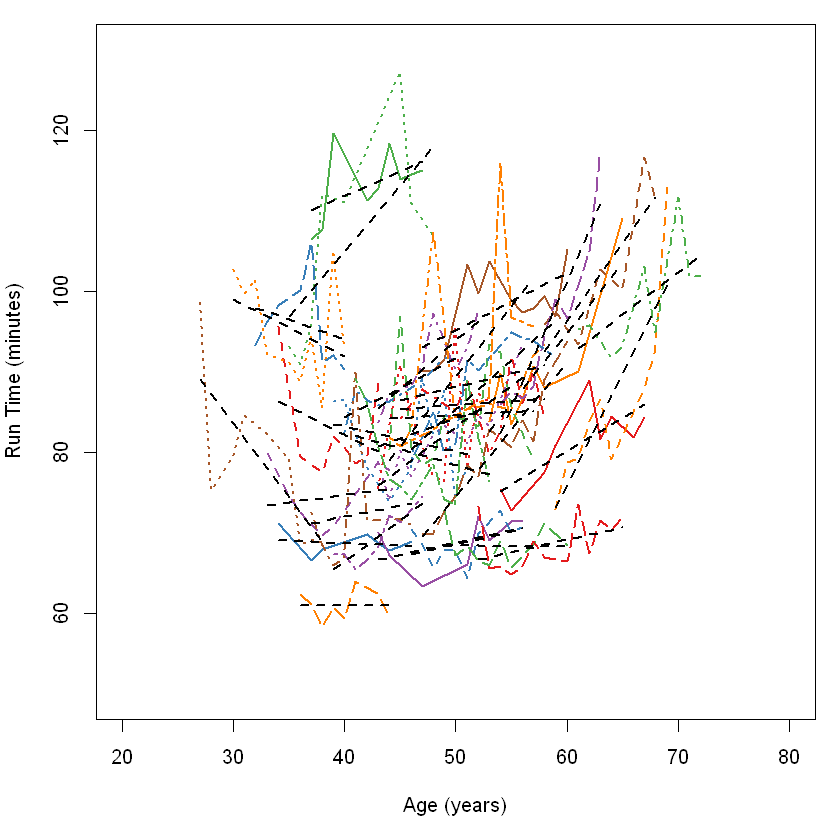

In [101]:
colors = c("#e41a1c", "#377eb8","#4daf4a", "#984ea3", 
           "#ff7f00", "#a65628")

par(mfrow = c(1, 1), mar = c(5, 4, 1, 1))

plot( x = 0, y = 0, type = "n",
      xlim = c(20, 80), ylim = c(50, 130),
      xlab = "Age (years)", ylab = "Run Time (minutes)")
     
addRunners(men8L[ groups == 9 ], colors, numLty = 6)
lapply(men8L[groups == 9], fitOne, addLine = TRUE, col = "black")

In [102]:
men8LongFit = lapply(men8L, fitOne)
coeffs = sapply(men8LongFit, "[", "ageCoeff" )
ages = sapply(men8LongFit, "[", "medAge")

longCoeffs = lm(coeffs ~ ages)

summary(longCoeffs)


Call:
lm(formula = coeffs ~ ages)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4026 -0.6375 -0.0246  0.5645  3.3541 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.958440   0.305487  -6.411 5.51e-10 ***
ages         0.055263   0.006175   8.949  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.01 on 304 degrees of freedom
Multiple R-squared:  0.2085,	Adjusted R-squared:  0.2059 
F-statistic: 80.09 on 1 and 304 DF,  p-value: < 2.2e-16


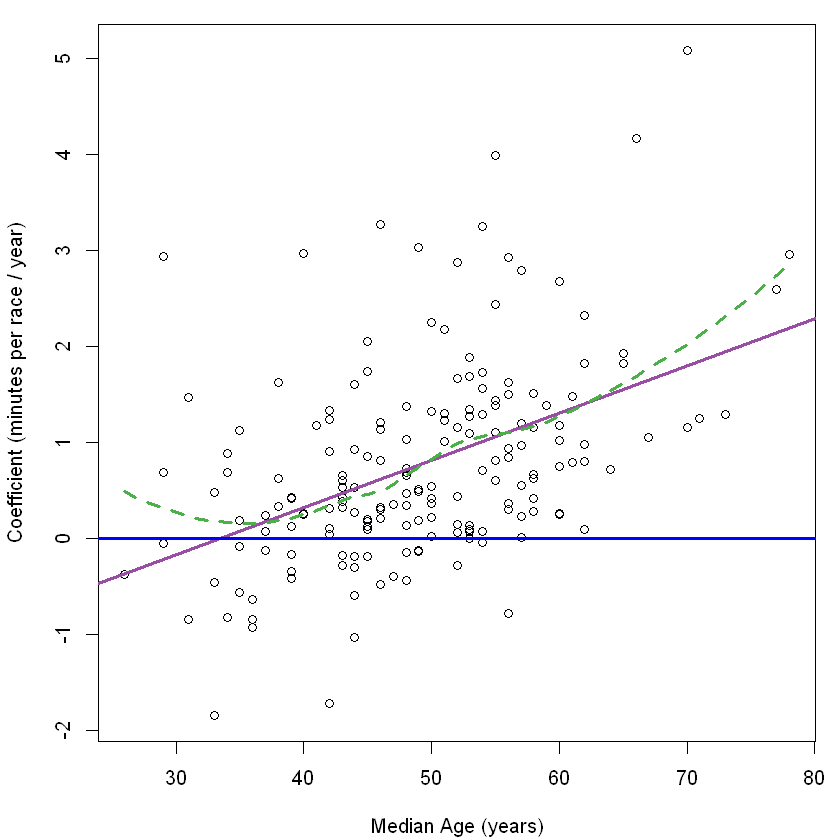

In [100]:

#pdf("CB_LongCoeffs.pdf", width = 10, height = 7)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(coeffs ~ ages, xlab = "Median Age (years)",
     ylab = "Coefficient (minutes per race / year)")
abline(longCoeffs, col = "#984ea3", lwd = 3)
abline(h = 0, col="blue", lwd = 3)
loCoeffs = loess(coeffs ~ ages)
ageV = min(ages):max(ages)
predV = predict(loCoeffs, new = data.frame(ages = ageV))
lines(x = ageV, y = predV, lwd = 3, lty = 2, col = "#4daf4a")
par(oldPar)
#dev.off()